In [1]:
# Load All Possible Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
# Load the dateset
df_2018 = pd.read_csv("2018-QS-World-University-Rankings.csv", encoding="latin")
df_2019 = pd.read_csv(r"2019-QS-World-University-Rankings.csv", encoding="latin")
df_2020 = pd.read_csv(r"2020-QS-World-University-Rankings.csv", encoding="latin")

In [3]:
df_2018.head()

,2018,2017,Institution Name,Country,Classification,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Academic Reputation,...,Unnamed: 12,Faculty Student,Unnamed: 14,Citations per Faculty,Unnamed: 16,International Faculty,Unnamed: 18,International Students,Unnamed: 20,Overall Score
0,NaN,NaN,NaN,NaN,SIZE,FOCUS,RESEARCH INTENSITY,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,NaN
1,1,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,M,CO,VH,5,B,100,...,4,100,14,99.9,8,100,36,96.1,70,100
2,2,2,STANFORD UNIVERSITY,United States,L,FC,VH,5,B,100,...,5,100,12,99.4,12,99.6,54,72.7,177,98.7
3,3,3,HARVARD UNIVERSITY,United States,L,FC,VH,5,B,100,...,3,98.3,38,99.9,9,96.5,103,75.2,165,98.4
4,4,5,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,S,CO,VH,5,B,99.5,...,77,100,3,100,4,93.4,126,89.2,106,97.7


In [4]:
# Reload the dateset with Proper Headers
df_2018 = pd.read_csv("2018-QS-World-University-Rankings.csv", names=[2018, 2017, "Institution", "Country", "Classification_Size", "Classification_Focus", "Research_Intensity", "Age", "Status", "Academic_Reputation_Score", "Academic_Reputation_Rank", "Employer_Reputation_Score", "Employer_Reputation_Rank", "Faculty_Student_Score", "Faculty_Student_Rank", "Citations_Per_Faculty_Score", "Citations_Per_Faculty_Rank", "International_Faculty_Score", "International_Faculty_Rank", "International_Student_Score", "International_Student_Rank", "Overall_Score"], skiprows=2, encoding="latin")
df_2019 = pd.read_csv(r"2019-QS-World-University-Rankings.csv", names=[2019, 2018, "Institution", "Country", "Classification_Size", "Classification_Focus", "Research_Intensity", "Age", "Status", "Academic_Reputation_Score", "Academic_Reputation_Rank", "Employer_Reputation_Score", "Employer_Reputation_Rank", "Faculty_Student_Score", "Faculty_Student_Rank", "Citations_Per_Faculty_Score", "Citations_Per_Faculty_Rank", "International_Faculty_Score", "International_Faculty_Rank", "International_Student_Score", "International_Student_Rank", "Overall_Score"], skiprows=2, encoding="latin")
df_2020 = pd.read_csv(r"2020-QS-World-University-Rankings.csv", names=[2020, 2019, "Institution", "Country", "Classification_Size", "Classification_Focus", "Research_Intensity", "Age", "Status", "Academic_Reputation_Score", "Academic_Reputation_Rank", "Employer_Reputation_Score", "Employer_Reputation_Rank", "Faculty_Student_Score", "Faculty_Student_Rank", "Citations_Per_Faculty_Score", "Citations_Per_Faculty_Rank", "International_Faculty_Score", "International_Faculty_Rank", "International_Student_Score", "International_Student_Rank", "Overall_Score"], skiprows=2, encoding="latin")

In [5]:
# Take out rows whose almost 60% of the observations are missing
df_2018.drop(df_2018.index[501:], inplace=True)
df_2018.tail()

,2018,2017,Institution,Country,Classification_Size,Classification_Focus,Research_Intensity,Age,Status,Academic_Reputation_Score,...,Employer_Reputation_Rank,Faculty_Student_Score,Faculty_Student_Rank,Citations_Per_Faculty_Score,Citations_Per_Faculty_Rank,International_Faculty_Score,International_Faculty_Rank,International_Student_Score,International_Student_Rank,Overall_Score
496,491-500,451-460,PUSAN NATIONAL UNIVERSITY,South Korea,L,FC,VH,4.0,A,-,...,-,34.7,376,21.8,401+,8.1,401+,11.1,401+,25.2
497,491-500,501-550,"UNIVERSIDADE ESTADUAL PAULISTA ""JÚLIO DE MESQU...",Brazil,XL,FC,VH,3.0,A,-,...,-,27.4,401+,10.8,401+,5.9,401+,3.3,401+,25.8
498,491-500,491-500,UNIVERSITÉ SAINT-JOSEPH DE BEYROUTH,Lebanon,M,FC,MD,5.0,B,-,...,-,70.2,165,2.2,401+,59.9,265,9.3,401+,25.6
499,491-500,501-550,UNIVERSITY OF GUELPH,Canada,L,CO,VH,4.0,A,-,...,-,9.5,401+,40.9,311,46.9,320,15.5,401+,25.3
500,491-500,601-650,URAL FEDERAL UNIVERSITY,Russia,L,CO,HI,4.0,A,-,...,-,73.5,152,1.7,401+,13.5,401+,19.2,401+,25.3


In [6]:
df_2019.drop(df_2019.index[1000:], inplace=True)
df_2019.tail()

,2019,2018,Institution,Country,Classification_Size,Classification_Focus,Research_Intensity,Age,Status,Academic_Reputation_Score,...,Employer_Reputation_Rank,Faculty_Student_Score,Faculty_Student_Rank,Citations_Per_Faculty_Score,Citations_Per_Faculty_Rank,International_Faculty_Score,International_Faculty_Rank,International_Student_Score,International_Student_Rank,Overall_Score
995,801-1000,801-1000,VORONEZH STATE UNIVERSITY,Russia,L,CO,MD,5.0,A,-,...,-,40.2,383,-,-,-,-,18.1,547,7.2 - 14.2
996,801-1000,801-1000,VYTAUTAS MAGNUS UNIVERSITY,Lithuania,M,FO,HI,4.0,A,-,...,-,-,-,-,-,28.1,464,-,-,7.2 - 14.2
997,801-1000,801-1000,WEST UNIVERSITY OF TIMISOARA,Romania,L,FO,HI,4.0,A,-,...,-,-,-,-,-,-,-,-,-,7.2 - 14.2
998,801-1000,801-1000,WROCLAW UNIVERSITY OF TECHNOLOGY,Poland,L,FO,VH,5.0,A,-,...,499,-,-,-,-,NaN,-,NaN,-,7.2 - 14.2
999,801-1000,751-800,YEUNGNAM UNIVERSITY,South Korea,L,FC,HI,4.0,C,-,...,-,-,-,19.1,564,27.8,468,-,-,7.2 - 14.2


In [7]:
df_2020.drop(df_2020.index[1002:], inplace=True)
df_2020.tail()

,2020,2019,Institution,Country,Classification_Size,Classification_Focus,Research_Intensity,Age,Status,Academic_Reputation_Score,...,Employer_Reputation_Rank,Faculty_Student_Score,Faculty_Student_Rank,Citations_Per_Faculty_Score,Citations_Per_Faculty_Rank,International_Faculty_Score,International_Faculty_Rank,International_Student_Score,International_Student_Rank,Overall_Score
997,801-1000,NaN,Warsaw University of Life Sciences,Poland,L,FO,VH,5.0,A,-,...,-,28.8,521,-,-,-,-,-,-,9 - 14.1
998,801-1000,801-1000,Wroc?aw University of Science and Technology,Poland,L,FO,VH,5.0,A,-,...,-,26.3,564,-,-,-,-,-,-,9 - 14.1
999,801-1000,NaN,Wuhan University of Technology,China,XL,FO,VH,2.0,A,-,...,-,-,-,18.9,569,-,-,-,-,9 - 14.1
1000,801-1000,NaN,Xi'an Jiaotong-Liverpool University,China,M,CO,HI,2.0,B,-,...,-,-,-,-,-,100,33,-,-,9 - 14.1
1001,801-1000,801-1000,Yeungnam University,South Korea,L,FC,HI,4.0,C,-,...,-,-,-,23.4,503,21.9,524,-,-,9 - 14.1


In [8]:
# The score should be independent of the previous years' ranks, institution's name, and Age
# We drop all the columns that should not affect the overall score
df_2018.columns

Index([                         2018,                          2017,
                       'Institution',                     'Country',
               'Classification_Size',        'Classification_Focus',
                'Research_Intensity',                         'Age',
                            'Status',   'Academic_Reputation_Score',
          'Academic_Reputation_Rank',   'Employer_Reputation_Score',
          'Employer_Reputation_Rank',       'Faculty_Student_Score',
              'Faculty_Student_Rank', 'Citations_Per_Faculty_Score',
        'Citations_Per_Faculty_Rank', 'International_Faculty_Score',
        'International_Faculty_Rank', 'International_Student_Score',
        'International_Student_Rank',               'Overall_Score'],
      dtype='object')

In [9]:
list(df_2018.filter(regex="Rank$", axis=1).columns)

['Academic_Reputation_Rank',
 'Employer_Reputation_Rank',
 'Faculty_Student_Rank',
 'Citations_Per_Faculty_Rank',
 'International_Faculty_Rank',
 'International_Student_Rank']

In [10]:
df_2018 = df_2018.drop(columns=[2018, 2017, "Institution", "Country", "Age", 'Academic_Reputation_Rank', 'Employer_Reputation_Rank', 'Faculty_Student_Rank', 'Citations_Per_Faculty_Rank', 'International_Faculty_Rank', 'International_Student_Rank'], axis=1)

In [11]:
df_2019.columns

Index([                         2019,                          2018,
                       'Institution',                     'Country',
               'Classification_Size',        'Classification_Focus',
                'Research_Intensity',                         'Age',
                            'Status',   'Academic_Reputation_Score',
          'Academic_Reputation_Rank',   'Employer_Reputation_Score',
          'Employer_Reputation_Rank',       'Faculty_Student_Score',
              'Faculty_Student_Rank', 'Citations_Per_Faculty_Score',
        'Citations_Per_Faculty_Rank', 'International_Faculty_Score',
        'International_Faculty_Rank', 'International_Student_Score',
        'International_Student_Rank',               'Overall_Score'],
      dtype='object')

In [12]:
list(df_2019.filter(regex="Rank$", axis=1).columns)

['Academic_Reputation_Rank',
 'Employer_Reputation_Rank',
 'Faculty_Student_Rank',
 'Citations_Per_Faculty_Rank',
 'International_Faculty_Rank',
 'International_Student_Rank']

In [13]:
df_2019 = df_2019.drop(columns=[2019, 2018, "Institution", "Country", "Age", 'Academic_Reputation_Rank', 'Employer_Reputation_Rank', 'Faculty_Student_Rank', 'Citations_Per_Faculty_Rank', 'International_Faculty_Rank', 'International_Student_Rank'], axis=1)

In [14]:
df_2020.columns

Index([                         2020,                          2019,
                       'Institution',                     'Country',
               'Classification_Size',        'Classification_Focus',
                'Research_Intensity',                         'Age',
                            'Status',   'Academic_Reputation_Score',
          'Academic_Reputation_Rank',   'Employer_Reputation_Score',
          'Employer_Reputation_Rank',       'Faculty_Student_Score',
              'Faculty_Student_Rank', 'Citations_Per_Faculty_Score',
        'Citations_Per_Faculty_Rank', 'International_Faculty_Score',
        'International_Faculty_Rank', 'International_Student_Score',
        'International_Student_Rank',               'Overall_Score'],
      dtype='object')

In [15]:
list(df_2020.filter(regex="Rank$", axis=1).columns)

['Academic_Reputation_Rank',
 'Employer_Reputation_Rank',
 'Faculty_Student_Rank',
 'Citations_Per_Faculty_Rank',
 'International_Faculty_Rank',
 'International_Student_Rank']

In [16]:
df_2020 = df_2020.drop(columns=[2020, 2019, "Institution", "Country", "Age", 'Academic_Reputation_Rank', 'Employer_Reputation_Rank', 'Faculty_Student_Rank', 'Citations_Per_Faculty_Rank', 'International_Faculty_Rank', 'International_Student_Rank'], axis=1)

In [17]:
df_2018.tail()

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
496,L,FC,VH,A,-,-,34.7,21.8,8.1,11.1,25.2
497,XL,FC,VH,A,-,-,27.4,10.8,5.9,3.3,25.8
498,M,FC,MD,B,-,-,70.2,2.2,59.9,9.3,25.6
499,L,CO,VH,A,-,-,9.5,40.9,46.9,15.5,25.3
500,L,CO,HI,A,-,-,73.5,1.7,13.5,19.2,25.3


In [18]:
df_2018.shape

(501, 11)

In [19]:
df_2018.isnull().sum()

Classification_Size            0
Classification_Focus           0
Research_Intensity             0
Status                         3
Academic_Reputation_Score      0
Employer_Reputation_Score      0
Faculty_Student_Score          0
Citations_Per_Faculty_Score    1
International_Faculty_Score    6
International_Student_Score    1
Overall_Score                  0
dtype: int64

In [20]:
df_2018.replace(to_replace="-", value=np.nan, inplace=True)

In [21]:
df_2018.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           3
Academic_Reputation_Score      101
Employer_Reputation_Score      101
Faculty_Student_Score            0
Citations_Per_Faculty_Score      1
International_Faculty_Score      6
International_Student_Score      1
Overall_Score                    0
dtype: int64

In [22]:
df_2018.columns

Index(['Classification_Size', 'Classification_Focus', 'Research_Intensity',
       'Status', 'Academic_Reputation_Score', 'Employer_Reputation_Score',
       'Faculty_Student_Score', 'Citations_Per_Faculty_Score',
       'International_Faculty_Score', 'International_Student_Score',
       'Overall_Score'],
      dtype='object')

In [23]:
df_2018[['Academic_Reputation_Score', 'Employer_Reputation_Score',
       'Faculty_Student_Score', 'Citations_Per_Faculty_Score',
       'International_Faculty_Score', 'International_Student_Score']] = df_2018[['Academic_Reputation_Score', 'Employer_Reputation_Score',
       'Faculty_Student_Score', 'Citations_Per_Faculty_Score',
       'International_Faculty_Score', 'International_Student_Score']].astype("float64")

In [24]:
df_2018[df_2018.Status.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
192,S,FO,VH,NaN,20.8,11.1,91.2,98.3,2.4,18.2,48.5
193,S,FC,VH,NaN,18.8,18.7,86.3,96.0,2.0,49.8,48.5
467,L,FO,VH,NaN,NaN,NaN,2.8,81.1,NaN,25.7,27.1


In [25]:
df_2018.Status.iloc[186:200]

186      A
187      A
188      A
189      A
190      A
191      B
192    NaN
193    NaN
194      A
195      A
196      A
197      A
198      B
199      A
Name: Status, dtype: object

In [26]:
df_2018.Status.iloc[192] = df_2018.Status.iloc[186:192].mode().iat[0]

In [27]:
df_2018.Status.iloc[193] = df_2018.Status.iloc[194:200].mode().iat[0]

In [28]:
df_2018.Status.iloc[467] = df_2018.Status.iloc[462:467].mode().iat[0]

In [29]:
df_2018.Status.isnull().sum()

0

In [30]:
df_2018[df_2018.Academic_Reputation_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
400,L,CO,VH,A,NaN,NaN,2.3,79.5,10.4,26.9,30.1
401,L,FO,VH,A,NaN,NaN,11.3,63.7,1.6,2.6,30.3
402,L,FO,VH,A,NaN,NaN,93.8,2.2,12.7,56.5,29.9
403,XL,FC,VH,A,NaN,NaN,6.3,56.7,27.3,35.3,30.2
404,M,CO,MD,B,NaN,NaN,99.8,1.0,10.6,NaN,30
...,...,...,...,...,...,...,...,...,...,...,...
496,L,FC,VH,A,NaN,NaN,34.7,21.8,8.1,11.1,25.2
497,XL,FC,VH,A,NaN,NaN,27.4,10.8,5.9,3.3,25.8
498,M,FC,MD,B,NaN,NaN,70.2,2.2,59.9,9.3,25.6
499,L,CO,VH,A,NaN,NaN,9.5,40.9,46.9,15.5,25.3


In [31]:
print(df_2018.Academic_Reputation_Score.iloc[300:400].mode())
print(df_2018["Academic_Reputation_Score"].max())
print(df_2018["Academic_Reputation_Score"].min())

0     13.7
1     15.5
2     17.6
3     20.2
4     22.2
5     23.6
6     26.7
7     27.1
8     28.8
9     29.9
10    31.3
11    31.4
12    52.9
Name: Academic_Reputation_Score, dtype: float64
100.0
3.2


In [32]:
def feature_score(df=None, col=None, start_index=None, stop_index=None, min_n=None, max_n=None, ndigits=None):
    for i in df[col][df[col].isnull()==True].index[start_index:stop_index]:
        df[col].iloc[i] = round(random.uniform(min_n, max_n), ndigits)

In [33]:
feature_score(df=df_2018, col="Academic_Reputation_Score", start_index=0, stop_index=20, min_n=13.7, max_n=31.3, ndigits=1)
feature_score(df=df_2018, col="Academic_Reputation_Score", start_index=0, stop_index=20, min_n=13.7, max_n=31.3, ndigits=1)
feature_score(df=df_2018, col="Academic_Reputation_Score", start_index=0, stop_index=-1, min_n=3.2, max_n=31.3, ndigits=1)
df_2018.Academic_Reputation_Score.fillna(round(random.uniform(1, 5), 1), inplace=True)

In [34]:
df_2018.Employer_Reputation_Score.isnull().sum()

101

In [35]:
df_2018[df_2018.Employer_Reputation_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
400,L,CO,VH,A,29.8,NaN,2.3,79.5,10.4,26.9,30.1
401,L,FO,VH,A,15.0,NaN,11.3,63.7,1.6,2.6,30.3
402,L,FO,VH,A,24.1,NaN,93.8,2.2,12.7,56.5,29.9
403,XL,FC,VH,A,15.2,NaN,6.3,56.7,27.3,35.3,30.2
404,M,CO,MD,B,22.5,NaN,99.8,1.0,10.6,NaN,30
...,...,...,...,...,...,...,...,...,...,...,...
496,L,FC,VH,A,10.9,NaN,34.7,21.8,8.1,11.1,25.2
497,XL,FC,VH,A,5.1,NaN,27.4,10.8,5.9,3.3,25.8
498,M,FC,MD,B,14.1,NaN,70.2,2.2,59.9,9.3,25.6
499,L,CO,VH,A,20.6,NaN,9.5,40.9,46.9,15.5,25.3


In [36]:
print(df_2018.Employer_Reputation_Score.iloc[300:400].mode())
print(df_2018["Employer_Reputation_Score"].max())
print(df_2018["Employer_Reputation_Score"].min())

0    20.7
1    22.2
Name: Employer_Reputation_Score, dtype: float64
100.0
1.9


In [37]:
feature_score(df=df_2018, col="Employer_Reputation_Score", start_index=0, stop_index=20, min_n=10, max_n=22.2, ndigits=1)
feature_score(df=df_2018, col="Employer_Reputation_Score",start_index=0, stop_index=20, min_n=5, max_n=20, ndigits=1)
feature_score(df=df_2018, col="Employer_Reputation_Score", start_index=0, stop_index=-1, min_n=1.9, max_n=10, ndigits=1)
df_2018.Employer_Reputation_Score.fillna(round(random.uniform(1, 5), 1), inplace=True)

In [38]:
df_2018[df_2018.Citations_Per_Faculty_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
494,M,CO,LO,A,28.6,6.3,92.6,NaN,19.5,9.4,25.3


In [39]:
df_2018.Citations_Per_Faculty_Score.fillna(round(random.uniform(10, 20), 1), inplace=True)

In [40]:
df_2018[df_2018.International_Faculty_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
189,S,SP,VH,A,38.3,22.3,56.1,100.0,NaN,2.1,49
327,M,FC,VH,B,3.2,6.4,96.3,65.9,NaN,24.2,35.6
363,L,FC,LO,B,24.2,66.9,76.9,1.2,NaN,19.5,33
415,XL,CO,MD,A,14.2,17.1,37.2,1.8,NaN,1.8,29.4
467,L,FO,VH,A,14.3,6.5,2.8,81.1,NaN,25.7,27.1
478,M,FO,VH,A,15.4,6.2,9.7,84.3,NaN,1.3,26.4


In [41]:
print(df_2018.International_Faculty_Score.mode())
print(df_2018["International_Faculty_Score"].max())
print(df_2018["International_Faculty_Score"].min())

0    100.0
Name: International_Faculty_Score, dtype: float64
100.0
1.3


In [42]:
feature_score(df=df_2018, col="International_Faculty_Score", start_index=0, stop_index=-1, min_n=1.3, max_n=80, ndigits=1)
df_2018.International_Faculty_Score.fillna(round(random.uniform(1, 10), 1), inplace=True)

In [43]:
df_2018[df_2018.International_Student_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
404,M,CO,MD,B,22.5,19.5,99.8,1.0,10.6,NaN,30


In [44]:
print(df_2018.International_Student_Score.mode())
print(df_2018["International_Student_Score"].max())
print(df_2018["International_Student_Score"].min())

0    100.0
Name: International_Student_Score, dtype: float64
100.0
1.0


In [45]:
feature_score(df=df_2018, col="International_Student_Score", start_index=0, stop_index=-1, min_n=1, max_n=80, ndigits=1)
df_2018.International_Student_Score.fillna(round(random.uniform(1, 10), 1), inplace=True)

In [46]:
df_2018.isnull().sum()

Classification_Size            0
Classification_Focus           0
Research_Intensity             0
Status                         0
Academic_Reputation_Score      0
Employer_Reputation_Score      0
Faculty_Student_Score          0
Citations_Per_Faculty_Score    0
International_Faculty_Score    0
International_Student_Score    0
Overall_Score                  0
dtype: int64

In [47]:
df_2019.isnull().sum()

Classification_Size             0
Classification_Focus            0
Research_Intensity              0
Status                          0
Academic_Reputation_Score       0
Employer_Reputation_Score       2
Faculty_Student_Score           0
Citations_Per_Faculty_Score     0
International_Faculty_Score    53
International_Student_Score    12
Overall_Score                   0
dtype: int64

In [48]:
df_2019.replace(to_replace="-", value=np.nan, inplace=True)

In [49]:
df_2019.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score      411
Employer_Reputation_Score      385
Faculty_Student_Score          293
Citations_Per_Faculty_Score    322
International_Faculty_Score    327
International_Student_Score    309
Overall_Score                    0
dtype: int64

In [50]:
df_2019[['Academic_Reputation_Score', 'Employer_Reputation_Score',
       'Faculty_Student_Score', 'Citations_Per_Faculty_Score',
       'International_Faculty_Score', 'International_Student_Score']] = df_2019[['Academic_Reputation_Score', 'Employer_Reputation_Score',
       'Faculty_Student_Score', 'Citations_Per_Faculty_Score',
       'International_Faculty_Score', 'International_Student_Score']].astype("float64")

In [51]:
df_2019[df_2019.Academic_Reputation_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
503,L,FC,VH,B,NaN,NaN,43.0,27.9,41.9,48.4,23.1 - 23.4
504,L,CO,VH,A,NaN,NaN,36.2,27.2,49.9,44.7,23.1 - 23.4
505,M,FC,HI,B,NaN,NaN,88.6,NaN,NaN,NaN,23.1 - 23.4
506,M,CO,VH,B,NaN,NaN,37.9,45.2,NaN,47.0,23.1 - 23.4
507,M,CO,HI,A,NaN,NaN,99.4,NaN,NaN,14.9,23.1 - 23.4
...,...,...,...,...,...,...,...,...,...,...,...
995,L,CO,MD,A,NaN,NaN,40.2,NaN,NaN,18.1,7.2 - 14.2
996,M,FO,HI,A,NaN,NaN,NaN,NaN,28.1,NaN,7.2 - 14.2
997,L,FO,HI,A,NaN,NaN,NaN,NaN,NaN,NaN,7.2 - 14.2
998,L,FO,VH,A,NaN,17.9,NaN,NaN,NaN,NaN,7.2 - 14.2


In [52]:
print(df_2019.Academic_Reputation_Score.mode())
print(df_2019["Academic_Reputation_Score"].max())
print(df_2019["Academic_Reputation_Score"].min())

0    100.0
Name: Academic_Reputation_Score, dtype: float64
100.0
3.0


In [53]:
feature_score(df=df_2019, col="Academic_Reputation_Score", start_index=0, stop_index=-1, min_n=3, max_n=60, ndigits=1)
df_2019.Academic_Reputation_Score.fillna(round(random.uniform(10, 35), 1), inplace=True)

In [54]:
df_2019.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score        0
Employer_Reputation_Score      385
Faculty_Student_Score          293
Citations_Per_Faculty_Score    322
International_Faculty_Score    327
International_Student_Score    309
Overall_Score                    0
dtype: int64

In [55]:
df_2019[df_2019.Employer_Reputation_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
503,L,FC,VH,B,58.6,NaN,43.0,27.9,41.9,48.4,23.1 - 23.4
504,L,CO,VH,A,20.6,NaN,36.2,27.2,49.9,44.7,23.1 - 23.4
505,M,FC,HI,B,43.9,NaN,88.6,NaN,NaN,NaN,23.1 - 23.4
506,M,CO,VH,B,53.1,NaN,37.9,45.2,NaN,47.0,23.1 - 23.4
507,M,CO,HI,A,59.6,NaN,99.4,NaN,NaN,14.9,23.1 - 23.4
...,...,...,...,...,...,...,...,...,...,...,...
993,L,FC,HI,A,47.4,NaN,NaN,26.4,NaN,NaN,7.2 - 14.2
995,L,CO,MD,A,48.3,NaN,40.2,NaN,NaN,18.1,7.2 - 14.2
996,M,FO,HI,A,37.7,NaN,NaN,NaN,28.1,NaN,7.2 - 14.2
997,L,FO,HI,A,31.8,NaN,NaN,NaN,NaN,NaN,7.2 - 14.2


In [56]:
print(df_2019.Employer_Reputation_Score.mode())
print(df_2019["Employer_Reputation_Score"].max())
print(df_2019["Employer_Reputation_Score"].min())

0    100.0
Name: Employer_Reputation_Score, dtype: float64
100.0
2.5


In [57]:
feature_score(df=df_2019, col="Employer_Reputation_Score", start_index=0, stop_index=-1, min_n=2.5, max_n=50, ndigits=1)
df_2019.Employer_Reputation_Score.fillna(round(random.uniform(5, 25), 1), inplace=True)

In [58]:
df_2019.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score        0
Employer_Reputation_Score        0
Faculty_Student_Score          293
Citations_Per_Faculty_Score    322
International_Faculty_Score    327
International_Student_Score    309
Overall_Score                    0
dtype: int64

In [59]:
df_2019[df_2019.Faculty_Student_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
511,XL,FC,VH,A,32.7,40.5,NaN,30.0,NaN,NaN,23.1 - 23.4
518,L,FC,MD,A,33.1,52.2,NaN,NaN,NaN,NaN,22.9 - 23
519,XL,CO,VH,A,29.1,42.4,NaN,33.0,NaN,17.4,22.9 - 23
522,XL,FC,VH,A,30.8,55.0,NaN,NaN,NaN,NaN,22.6 - 22.8
523,L,FC,VH,A,54.3,41.2,NaN,47.3,38.9,NaN,22.6 - 22.8
...,...,...,...,...,...,...,...,...,...,...,...
993,L,FC,HI,A,47.4,45.6,NaN,26.4,NaN,NaN,7.2 - 14.2
996,M,FO,HI,A,37.7,33.1,NaN,NaN,28.1,NaN,7.2 - 14.2
997,L,FO,HI,A,31.8,36.3,NaN,NaN,NaN,NaN,7.2 - 14.2
998,L,FO,VH,A,8.2,17.9,NaN,NaN,NaN,NaN,7.2 - 14.2


In [60]:
print(df_2019.Faculty_Student_Score[500:].mode())
print(df_2019["Faculty_Student_Score"].iloc[500:].max())
print(df_2019["Faculty_Student_Score"].iloc[500:].min())

0    23.9
1    28.2
2    28.7
3    28.8
4    31.4
5    39.0
Name: Faculty_Student_Score, dtype: float64
99.4
18.9


In [61]:
feature_score(df=df_2019, col="Faculty_Student_Score", start_index=0, stop_index=-1, min_n=18.9, max_n=99.4, ndigits=1)
df_2019.Faculty_Student_Score.fillna(round(random.uniform(18.9, 50), 1), inplace=True)

In [62]:
df_2019.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score        0
Employer_Reputation_Score        0
Faculty_Student_Score            0
Citations_Per_Faculty_Score    322
International_Faculty_Score    327
International_Student_Score    309
Overall_Score                    0
dtype: int64

In [63]:
df_2019[df_2019.Citations_Per_Faculty_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
505,M,FC,HI,B,43.9,44.8,88.6,NaN,NaN,NaN,23.1 - 23.4
507,M,CO,HI,A,59.6,3.6,99.4,NaN,NaN,14.9,23.1 - 23.4
510,XL,CO,MD,A,27.4,36.4,41.5,NaN,NaN,NaN,23.1 - 23.4
513,M,FO,VH,A,23.2,42.6,74.2,NaN,17.2,36.9,22.9 - 23
514,M,FC,VH,A,9.9,22.6,82.5,NaN,NaN,NaN,22.9 - 23
...,...,...,...,...,...,...,...,...,...,...,...
994,XL,FO,HI,A,31.2,17.9,25.3,NaN,NaN,NaN,7.2 - 14.2
995,L,CO,MD,A,48.3,12.0,40.2,NaN,NaN,18.1,7.2 - 14.2
996,M,FO,HI,A,37.7,33.1,63.6,NaN,28.1,NaN,7.2 - 14.2
997,L,FO,HI,A,31.8,36.3,88.9,NaN,NaN,NaN,7.2 - 14.2


In [64]:
print(df_2019.Citations_Per_Faculty_Score[505:].mode())
print(df_2019["Citations_Per_Faculty_Score"].iloc[505:].max())
print(df_2019["Citations_Per_Faculty_Score"].iloc[505:].min())

0    18.8
1    18.9
2    30.0
3    30.6
4    32.3
5    32.8
Name: Citations_Per_Faculty_Score, dtype: float64
80.2
16.6


In [65]:
feature_score(df=df_2019, col="Citations_Per_Faculty_Score", start_index=0, stop_index=-1, min_n=16.6, max_n=80.2, ndigits=1)
df_2019.Citations_Per_Faculty_Score.fillna(round(random.uniform(16.6, 50), 1), inplace=True)

In [66]:
df_2019.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score        0
Employer_Reputation_Score        0
Faculty_Student_Score            0
Citations_Per_Faculty_Score      0
International_Faculty_Score    327
International_Student_Score    309
Overall_Score                    0
dtype: int64

In [67]:
df_2019[df_2019.International_Faculty_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
310,M,FC,VH,B,3.3,2.9,97.5,59.3,NaN,13.3,33.7
326,L,FC,VH,A,18.5,7.1,92.7,20.8,NaN,28.2,32.3
369,L,FC,LO,B,16.2,44.7,86.9,1.2,NaN,20.6,29.7
381,M,FO,VH,A,13.5,21.6,16.8,89.5,NaN,2.6,29
398,S,FO,VH,A,5.8,7.3,91.9,33.2,NaN,1.1,28.2
...,...,...,...,...,...,...,...,...,...,...,...
993,L,FC,HI,A,47.4,45.6,86.2,26.4,NaN,NaN,7.2 - 14.2
994,XL,FO,HI,A,31.2,17.9,25.3,27.0,NaN,NaN,7.2 - 14.2
995,L,CO,MD,A,48.3,12.0,40.2,56.6,NaN,18.1,7.2 - 14.2
997,L,FO,HI,A,31.8,36.3,88.9,20.9,NaN,NaN,7.2 - 14.2


In [68]:
print(df_2019.International_Faculty_Score[300:450].mode())
print(df_2019["International_Faculty_Score"].iloc[300:450].max())
print(df_2019["International_Faculty_Score"].iloc[300:450].min())

0    100.0
Name: International_Faculty_Score, dtype: float64
100.0
1.9


In [69]:
print(df_2019.International_Faculty_Score[500:].mode())
print(df_2019["International_Faculty_Score"].iloc[500:].max())
print(df_2019["International_Faculty_Score"].iloc[500:].min())

0    100.0
Name: International_Faculty_Score, dtype: float64
100.0
5.0


In [70]:
df_2019[df_2019.International_Faculty_Score.isnull()==True].index

Int64Index([310, 326, 369, 381, 398, 445, 500, 505, 506, 507,
            ...
            987, 988, 989, 991, 992, 993, 994, 995, 997, 998],
           dtype='int64', length=327)

In [71]:
feature_score(df=df_2019, col="International_Faculty_Score", start_index=0, stop_index=7, min_n=1.9, max_n=80.2, ndigits=1)
feature_score(df=df_2019, col="International_Faculty_Score", start_index=0, stop_index=-1, min_n=5, max_n=80.2, ndigits=1)
df_2019.International_Faculty_Score.fillna(round(random.uniform(5, 50), 1), inplace=True)

In [72]:
df_2019.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score        0
Employer_Reputation_Score        0
Faculty_Student_Score            0
Citations_Per_Faculty_Score      0
International_Faculty_Score      0
International_Student_Score    309
Overall_Score                    0
dtype: int64

In [73]:
df_2019[df_2019.International_Student_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
473,XL,FC,VH,A,28.9,17.4,5.8,51.8,3.1,NaN,25
505,M,FC,HI,B,43.9,44.8,88.6,77.0,41.5,NaN,23.1 - 23.4
508,L,FC,VH,A,19.8,43.5,42.2,21.1,67.2,NaN,23.1 - 23.4
510,XL,CO,MD,A,27.4,36.4,41.5,53.3,31.7,NaN,23.1 - 23.4
511,XL,FC,VH,A,32.7,40.5,44.2,30.0,32.9,NaN,23.1 - 23.4
...,...,...,...,...,...,...,...,...,...,...,...
994,XL,FO,HI,A,31.2,17.9,25.3,27.0,18.7,NaN,7.2 - 14.2
996,M,FO,HI,A,37.7,33.1,63.6,77.9,28.1,NaN,7.2 - 14.2
997,L,FO,HI,A,31.8,36.3,88.9,20.9,22.9,NaN,7.2 - 14.2
998,L,FO,VH,A,8.2,17.9,23.6,43.5,18.8,NaN,7.2 - 14.2


In [74]:
print(df_2019.International_Student_Score[450:].mode())
print(df_2019["International_Student_Score"].iloc[450:].max())
print(df_2019["International_Student_Score"].iloc[450:].min())

0     14.8
1    100.0
Name: International_Student_Score, dtype: float64
100.0
1.6


In [75]:
feature_score(df=df_2019, col="International_Student_Score", start_index=0, stop_index=-1, min_n=10, max_n=60, ndigits=1)
df_2019.International_Student_Score.fillna(round(random.uniform(1, 50), 1), inplace=True)

In [76]:
df_2019.isnull().sum()

Classification_Size            0
Classification_Focus           0
Research_Intensity             0
Status                         0
Academic_Reputation_Score      0
Employer_Reputation_Score      0
Faculty_Student_Score          0
Citations_Per_Faculty_Score    0
International_Faculty_Score    0
International_Student_Score    0
Overall_Score                  0
dtype: int64

In [77]:
df_2019.Overall_Score.iloc[500:520]

500           23.5
501           23.5
502           23.5
503    23.1 - 23.4
504    23.1 - 23.4
505    23.1 - 23.4
506    23.1 - 23.4
507    23.1 - 23.4
508    23.1 - 23.4
509    23.1 - 23.4
510    23.1 - 23.4
511    23.1 - 23.4
512    23.1 - 23.4
513      22.9 - 23
514      22.9 - 23
515      22.9 - 23
516      22.9 - 23
517      22.9 - 23
518      22.9 - 23
519      22.9 - 23
Name: Overall_Score, dtype: object

In [78]:
df_2019.Overall_Score.iloc[503:].value_counts()

7.2 - 14.2     199
14.3 - 15.3     50
17.2 - 18.6     49
15.4 - 17.1     49
18.7 - 20.2     48
20.5 - 20.8     12
20.3 - 20.4     12
22.2 - 22.5     11
23.1 - 23.4     10
21.5 - 21.8     10
21.1 - 21.4     10
20.9 - 21       10
22.9 - 23        9
22.6 - 22.8      9
21.9 - 22.1      9
Name: Overall_Score, dtype: int64

In [79]:
df_2019.Overall_Score.iloc[503:513] = sorted([round(np.random.uniform(23.1,23.5), 1) for i in range(10)], reverse=True)

In [80]:
df_2019.Overall_Score.iloc[513:522] = sorted([round(np.random.uniform(22.9,23), 1) for i in range(9)], reverse=True)

In [81]:
df_2019.Overall_Score.iloc[513:522] = sorted([round(np.random.uniform(22.9,23), 1) for i in range(9)], reverse=True)

In [82]:
df_2019.Overall_Score.iloc[522:531] = sorted([round(np.random.uniform(22.6,22.8), 1) for i in range(9)], reverse=True)

In [83]:
df_2019.Overall_Score.iloc[531:542] = sorted([round(np.random.uniform(22.2,22.5), 1) for i in range(11)], reverse=True)

In [84]:
df_2019.Overall_Score.iloc[542:551] = sorted([round(np.random.uniform(21.9,22.1), 1) for i in range(9)], reverse=True)

In [85]:
df_2019.Overall_Score.iloc[551:561] = sorted([round(np.random.uniform(21.5,21.8), 1) for i in range(10)], reverse=True)

In [86]:
df_2019.Overall_Score.iloc[561:571] = sorted([round(np.random.uniform(21.1,21.4), 1) for i in range(10)], reverse=True)

In [87]:
df_2019.Overall_Score.iloc[571:581] = sorted([round(np.random.uniform(20.9,21), 1) for i in range(10)], reverse=True)

In [88]:
df_2019.Overall_Score.iloc[581:593] = sorted([round(np.random.uniform(20.5,20.8), 1) for i in range(12)], reverse=True)

In [89]:
df_2019.Overall_Score.iloc[593:605] = sorted([round(np.random.uniform(20.3,20.4), 1) for i in range(12)], reverse=True)

In [90]:
df_2019.Overall_Score.iloc[605:653] = sorted([round(np.random.uniform(18.7,20.2), 1) for i in range(48)], reverse=True)

In [91]:
df_2019.Overall_Score.iloc[653:702] = sorted([round(np.random.uniform(17.2,18.6), 1) for i in range(49)], reverse=True)

In [92]:
df_2019.Overall_Score.iloc[702:751] = sorted([round(np.random.uniform(15.4,17.1), 1) for i in range(49)], reverse=True)

In [93]:
df_2019.Overall_Score.iloc[751:801] = sorted([round(np.random.uniform(14.3,15.3), 1) for i in range(50)], reverse=True)

In [94]:
df_2019.Overall_Score.iloc[801:1000] = sorted([round(np.random.uniform(7.2,14.2), 1) for i in range(199)], reverse=True)

In [95]:
df_2019[['Overall_Score']] = df_2019[['Overall_Score']].astype("float64")

In [96]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Classification_Size          1000 non-null   object 
 1   Classification_Focus         1000 non-null   object 
 2   Research_Intensity           1000 non-null   object 
 3   Status                       1000 non-null   object 
 4   Academic_Reputation_Score    1000 non-null   float64
 5   Employer_Reputation_Score    1000 non-null   float64
 6   Faculty_Student_Score        1000 non-null   float64
 7   Citations_Per_Faculty_Score  1000 non-null   float64
 8   International_Faculty_Score  1000 non-null   float64
 9   International_Student_Score  1000 non-null   float64
 10  Overall_Score                1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [97]:
df_2020.isnull().sum()

Classification_Size             0
Classification_Focus           23
Research_Intensity             24
Status                         40
Academic_Reputation_Score       0
Employer_Reputation_Score       0
Faculty_Student_Score           0
Citations_Per_Faculty_Score     0
International_Faculty_Score    41
International_Student_Score     5
Overall_Score                   0
dtype: int64

In [98]:
df_2020.replace(to_replace="-", value=np.nan, inplace=True)

In [99]:
df_2020.isnull().sum()

Classification_Size              0
Classification_Focus            23
Research_Intensity              24
Status                          40
Academic_Reputation_Score      421
Employer_Reputation_Score      382
Faculty_Student_Score          293
Citations_Per_Faculty_Score    325
International_Faculty_Score    320
International_Student_Score    314
Overall_Score                    0
dtype: int64

In [100]:
df_2020[['Academic_Reputation_Score', 'Employer_Reputation_Score',
       'Faculty_Student_Score', 'Citations_Per_Faculty_Score',
       'International_Faculty_Score', 'International_Student_Score']] = df_2020[['Academic_Reputation_Score', 'Employer_Reputation_Score',
       'Faculty_Student_Score', 'Citations_Per_Faculty_Score',
       'International_Faculty_Score', 'International_Student_Score']].astype("float64")

In [101]:
df_2020[df_2020.Classification_Focus.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
52,L,NaN,NaN,NaN,77.7,98.6,100.0,26.2,67.1,72.1,73.4
254,XL,NaN,NaN,NaN,48.5,7.6,33.5,46.1,19.1,7.5,37.5
396,L,NaN,NaN,NaN,24.8,30.7,29.0,38.1,29.2,8.6,28.4
491,S,NaN,NaN,A,6.6,17.2,23.6,56.3,49.4,28.6,24.3
599,XL,NaN,NaN,NaN,NaN,NaN,NaN,29.8,66.2,68.2,20.3 - 20.4
659,L,NaN,NaN,NaN,NaN,NaN,53.9,NaN,NaN,NaN,16.7 - 18.4
684,XL,NaN,NaN,NaN,NaN,NaN,44.7,NaN,NaN,NaN,16.7 - 18.4
690,M,NaN,NaN,NaN,NaN,NaN,NaN,42.5,NaN,34.4,16.7 - 18.4
697,L,NaN,NaN,NaN,NaN,NaN,31.4,NaN,21.9,NaN,16.7 - 18.4
718,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.2,92.7,15.2 - 16.6


In [102]:
df_2020.Classification_Focus.iloc[52] = df_2020.Classification_Focus.iloc[:100].mode().iat[0]

In [103]:
df_2020.Classification_Focus.iloc[254] = df_2020.Classification_Focus.iloc[200:300].mode().iat[0]

In [104]:
df_2020.Classification_Focus.iloc[396] = df_2020.Classification_Focus.iloc[300:400].mode().iat[0]

In [105]:
df_2020.Classification_Focus.iloc[491] = df_2020.Classification_Focus.iloc[400:500].mode().iat[0]

In [106]:
df_2020.Classification_Focus.iloc[599] = df_2020.Classification_Focus.iloc[500:600].mode().iat[0]

In [107]:
print(df_2020.Classification_Focus.value_counts())
print(df_2020.Classification_Focus.value_counts().sum())

FC    476
CO    336
FO    134
SP     38
Name: Classification_Focus, dtype: int64
984


In [108]:
missing_no = df_2020.Classification_Focus.isnull().sum()
missing_no

18

In [109]:
df_2020.Classification_Focus.fillna(value="FC", limit=round(476/984*missing_no), inplace=True)
df_2020.Classification_Focus.fillna(value="CO", limit=round(336/984*missing_no), inplace=True)
df_2020.Classification_Focus.fillna(value="FO", limit=round(134/984*missing_no), inplace=True)
df_2020.Classification_Focus.fillna(value="SP", inplace=True)

In [110]:
df_2020.Classification_Focus.isnull().sum()

0

In [111]:
df_2020[df_2020.Research_Intensity.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
52,L,FC,NaN,NaN,77.7,98.6,100.0,26.2,67.1,72.1,73.4
254,XL,FC,NaN,NaN,48.5,7.6,33.5,46.1,19.1,7.5,37.5
396,L,FC,NaN,NaN,24.8,30.7,29.0,38.1,29.2,8.6,28.4
491,S,FC,NaN,A,6.6,17.2,23.6,56.3,49.4,28.6,24.3
599,XL,CO,NaN,NaN,NaN,NaN,NaN,29.8,66.2,68.2,20.3 - 20.4
659,L,FC,NaN,NaN,NaN,NaN,53.9,NaN,NaN,NaN,16.7 - 18.4
684,XL,FC,NaN,NaN,NaN,NaN,44.7,NaN,NaN,NaN,16.7 - 18.4
690,M,FC,NaN,NaN,NaN,NaN,NaN,42.5,NaN,34.4,16.7 - 18.4
697,L,FC,NaN,NaN,NaN,NaN,31.4,NaN,21.9,NaN,16.7 - 18.4
718,M,FC,NaN,NaN,NaN,NaN,NaN,NaN,60.2,92.7,15.2 - 16.6


In [112]:
df_2020.Classification_Focus.iloc[52] = df_2020.Classification_Focus.iloc[:100].mode().iat[0]

In [113]:
df_2020.Research_Intensity.iloc[254] = df_2020.Research_Intensity.iloc[200:300].mode().iat[0]

In [114]:
df_2020.Research_Intensity.iloc[396] = df_2020.Research_Intensity.iloc[300:400].mode().iat[0]

In [115]:
df_2020.Research_Intensity.iloc[491] = df_2020.Research_Intensity.iloc[400:500].mode().iat[0]

In [116]:
df_2020.Research_Intensity.iloc[599] = df_2020.Research_Intensity.iloc[500:600].mode().iat[0]

In [117]:
print(df_2020.Research_Intensity.value_counts())
print(df_2020.Research_Intensity.value_counts().sum())

VH    631
HI    256
MD     78
LO     17
Name: Research_Intensity, dtype: int64
982


In [118]:
missing_no = df_2020.Research_Intensity.isnull().sum()
missing_no

20

In [119]:
df_2020.Research_Intensity.fillna(value="VH", limit=round(631/982*missing_no), inplace=True)
df_2020.Research_Intensity.fillna(value="HI", limit=round(256/982*missing_no), inplace=True)
df_2020.Research_Intensity.fillna(value="MD", limit=round(78/982*missing_no), inplace=True)
df_2020.Research_Intensity.fillna(value="LO", inplace=True)

In [120]:
df_2020.Research_Intensity.isnull().sum()

0

In [121]:
df_2020[df_2020.Status.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
52,L,FC,VH,NaN,77.7,98.6,100.0,26.2,67.1,72.1,73.4
177,S,FC,VH,NaN,14.6,8.0,86.2,99.3,2.1,52.5,46.6
203,S,FO,VH,NaN,22.4,7.3,100.0,57.7,19.7,21.1,43.4
224,S,SP,HI,NaN,4.7,43.2,95.1,28.2,95.0,99.7,40.7
254,XL,FC,VH,NaN,48.5,7.6,33.5,46.1,19.1,7.5,37.5
310,M,FO,VH,NaN,12.8,11.2,88.4,17.4,67.1,54.5,33.6
396,L,FC,VH,NaN,24.8,30.7,29.0,38.1,29.2,8.6,28.4
514,M,FO,HI,NaN,NaN,46.0,32.3,NaN,55.4,75.2,22.9 - 23.4
545,M,FO,MD,NaN,NaN,23.4,47.3,NaN,50.6,41.7,21.8 - 21.9
558,L,SP,VH,NaN,NaN,NaN,NaN,59.4,NaN,NaN,21.5 - 21.7


In [122]:
df_2020.Status.iloc[52] = df_2020.Status.iloc[:100].mode().iat[0]

In [123]:
df_2020.Status.iloc[177] = df_2020.Status.iloc[100:200].mode().iat[0]

In [124]:
print(df_2020.Status.value_counts())
print(df_2020.Status.value_counts().sum())

A    795
B    161
C      8
Name: Status, dtype: int64
964


In [125]:
missing_no = df_2020.Status.isnull().sum()
missing_no

38

In [126]:
df_2020.Status.fillna(value="A", limit=round(795/964*missing_no), inplace=True)
df_2020.Status.fillna(value="B", limit=round(161/964*missing_no), inplace=True)
df_2020.Status.fillna(value="C", inplace=True)

In [127]:
df_2020.Research_Intensity.isnull().sum()

0

In [128]:
df_2020[df_2020.Academic_Reputation_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
501,M,FO,VH,A,NaN,25.7,46.9,NaN,40.5,84.0,23.5 - 24.1
502,XL,FC,MD,A,NaN,NaN,72.5,NaN,100.0,23.2,23.5 - 24.1
503,XL,FC,VH,A,NaN,NaN,39.7,50.0,NaN,NaN,23.5 - 24.1
504,XL,FC,MD,A,NaN,NaN,64.1,NaN,100.0,22.6,23.5 - 24.1
505,L,FC,HI,A,NaN,17.9,55.8,NaN,24.7,74.3,23.5 - 24.1
...,...,...,...,...,...,...,...,...,...,...,...
997,L,FO,VH,A,NaN,NaN,28.8,NaN,NaN,NaN,9 - 14.1
998,L,FO,VH,A,NaN,NaN,26.3,NaN,NaN,NaN,9 - 14.1
999,XL,FO,VH,A,NaN,NaN,NaN,18.9,NaN,NaN,9 - 14.1
1000,M,CO,HI,B,NaN,NaN,NaN,NaN,100.0,NaN,9 - 14.1


In [129]:
print(df_2020.Academic_Reputation_Score.iloc[500:].mode())
print(df_2020["Academic_Reputation_Score"].iloc[500:].max())
print(df_2020["Academic_Reputation_Score"].iloc[500:].min())

0    16.7
1    17.2
Name: Academic_Reputation_Score, dtype: float64
35.8
16.5


In [130]:
feature_score(df=df_2020, col="Academic_Reputation_Score", start_index=0, stop_index=-1, min_n=16.5, max_n=35.8, ndigits=1)
df_2020.Academic_Reputation_Score.fillna(round(random.uniform(16.5, 20), 1), inplace=True)

In [131]:
df_2020.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score        0
Employer_Reputation_Score      382
Faculty_Student_Score          293
Citations_Per_Faculty_Score    325
International_Faculty_Score    320
International_Student_Score    314
Overall_Score                    0
dtype: int64

In [132]:
df_2020[df_2020.Employer_Reputation_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
502,XL,FC,MD,A,31.5,NaN,72.5,NaN,100.0,23.2,23.5 - 24.1
503,XL,FC,VH,A,31.9,NaN,39.7,50.0,NaN,NaN,23.5 - 24.1
504,XL,FC,MD,A,22.3,NaN,64.1,NaN,100.0,22.6,23.5 - 24.1
508,L,FC,HI,A,17.8,NaN,53.9,NaN,NaN,58.4,23.5 - 24.1
509,L,CO,VH,A,20.2,NaN,NaN,52.2,NaN,66.4,23.5 - 24.1
...,...,...,...,...,...,...,...,...,...,...,...
997,L,FO,VH,A,28.1,NaN,28.8,NaN,NaN,NaN,9 - 14.1
998,L,FO,VH,A,29.6,NaN,26.3,NaN,NaN,NaN,9 - 14.1
999,XL,FO,VH,A,23.8,NaN,NaN,18.9,NaN,NaN,9 - 14.1
1000,M,CO,HI,B,26.7,NaN,NaN,NaN,100.0,NaN,9 - 14.1


In [133]:
print(df_2020.Employer_Reputation_Score.iloc[500:].mode())
print(df_2020["Employer_Reputation_Score"].iloc[500:].max())
print(df_2020["Employer_Reputation_Score"].iloc[500:].min())

0    20.7
1    22.0
2    23.0
3    26.4
Name: Employer_Reputation_Score, dtype: float64
63.6
17.9


In [134]:
feature_score(df=df_2020, col="Employer_Reputation_Score", start_index=0, stop_index=150, min_n=26.4, max_n=63.6, ndigits=1)
feature_score(df=df_2020, col="Employer_Reputation_Score", start_index=0, stop_index=-1, min_n=17.9, max_n=30, ndigits=1)
df_2020.Employer_Reputation_Score.fillna(round(random.uniform(17.9, 30), 1), inplace=True)

In [135]:
df_2020.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score        0
Employer_Reputation_Score        0
Faculty_Student_Score          293
Citations_Per_Faculty_Score    325
International_Faculty_Score    320
International_Student_Score    314
Overall_Score                    0
dtype: int64

In [136]:
df_2020[df_2020.Faculty_Student_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
500,M,CO,VH,B,20.0,28.8,NaN,24.0,58.6,14.9,23.5 - 24.1
509,L,CO,VH,A,20.2,41.4,NaN,52.2,NaN,66.4,23.5 - 24.1
510,XL,CO,VH,A,19.7,38.8,NaN,38.3,31.5,19.5,22.9 - 23.4
513,L,CO,VH,A,20.7,53.4,NaN,77.4,NaN,NaN,22.9 - 23.4
516,XL,FC,VH,A,35.8,33.5,NaN,21.3,NaN,21.5,22.9 - 23.4
...,...,...,...,...,...,...,...,...,...,...,...
994,XL,FO,HI,A,25.9,29.0,NaN,NaN,NaN,NaN,9 - 14.1
996,M,FO,VH,A,19.0,29.6,NaN,NaN,17.4,NaN,9 - 14.1
999,XL,FO,VH,A,23.8,18.3,NaN,18.9,NaN,NaN,9 - 14.1
1000,M,CO,HI,B,26.7,29.5,NaN,NaN,100.0,NaN,9 - 14.1


In [137]:
print(df_2020.Faculty_Student_Score.iloc[500:].mode())
print(df_2020["Faculty_Student_Score"].iloc[500:].max())
print(df_2020["Faculty_Student_Score"].iloc[500:].min())

0    28.5
1    45.2
Name: Faculty_Student_Score, dtype: float64
98.1
23.4


In [138]:
feature_score(df=df_2020, col="Faculty_Student_Score", start_index=0, stop_index=150, min_n=30, max_n=98.1, ndigits=1)
feature_score(df=df_2020, col="Faculty_Student_Score", start_index=0, stop_index=-1, min_n=23.4, max_n=45, ndigits=1)
df_2020.Faculty_Student_Score.fillna(round(random.uniform(10, 30), 1), inplace=True)

In [139]:
df_2020.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score        0
Employer_Reputation_Score        0
Faculty_Student_Score            0
Citations_Per_Faculty_Score    325
International_Faculty_Score    320
International_Student_Score    314
Overall_Score                    0
dtype: int64

In [140]:
df_2020[df_2020.Citations_Per_Faculty_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
501,M,FO,VH,A,32.0,25.7,46.9,NaN,40.5,84.0,23.5 - 24.1
502,XL,FC,MD,A,31.5,40.1,72.5,NaN,100.0,23.2,23.5 - 24.1
504,XL,FC,MD,A,22.3,42.0,64.1,NaN,100.0,22.6,23.5 - 24.1
505,L,FC,HI,A,23.1,17.9,55.8,NaN,24.7,74.3,23.5 - 24.1
506,M,CO,HI,A,16.5,26.8,68.9,NaN,NaN,NaN,23.5 - 24.1
...,...,...,...,...,...,...,...,...,...,...,...
995,L,CO,HI,A,35.0,19.6,37.3,NaN,NaN,16.3,9 - 14.1
996,M,FO,VH,A,19.0,29.6,33.5,NaN,17.4,NaN,9 - 14.1
997,L,FO,VH,A,28.1,21.8,28.8,NaN,NaN,NaN,9 - 14.1
998,L,FO,VH,A,29.6,22.0,26.3,NaN,NaN,NaN,9 - 14.1


In [141]:
print(df_2020.Citations_Per_Faculty_Score.iloc[500:].mode())
print(df_2020["Citations_Per_Faculty_Score"].iloc[500:].max())
print(df_2020["Citations_Per_Faculty_Score"].iloc[500:].min())

0    18.6
1    21.8
Name: Citations_Per_Faculty_Score, dtype: float64
80.2
17.5


In [142]:
feature_score(df=df_2020, col="Citations_Per_Faculty_Score", start_index=0, stop_index=150, min_n=21.8, max_n=80.2, ndigits=1)
feature_score(df=df_2020, col="Citations_Per_Faculty_Score", start_index=0, stop_index=-1, min_n=17.5, max_n=60, ndigits=1)
df_2020.Citations_Per_Faculty_Score.fillna(round(random.uniform(10, 45), 1), inplace=True)

In [143]:
df_2020.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score        0
Employer_Reputation_Score        0
Faculty_Student_Score            0
Citations_Per_Faculty_Score      0
International_Faculty_Score    320
International_Student_Score    314
Overall_Score                    0
dtype: int64

In [144]:
df_2020[df_2020.International_Faculty_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
340,L,FC,VH,A,18.8,3.7,98.0,14.0,NaN,28.6,31.8
362,M,FC,VH,B,2.6,3.3,99.3,42.9,NaN,11.6,30.5
375,S,FO,VH,A,5.4,4.6,96.4,36.2,NaN,NaN,29.2
383,M,FO,VH,A,13.7,19.6,11.7,93.8,NaN,3.0,28.8
490,M,CO,VH,A,11.7,15.2,18.7,71.2,NaN,1.5,24.3
...,...,...,...,...,...,...,...,...,...,...,...
994,XL,FO,HI,A,25.9,29.0,27.2,52.2,NaN,NaN,9 - 14.1
995,L,CO,HI,A,35.0,19.6,37.3,56.9,NaN,16.3,9 - 14.1
997,L,FO,VH,A,28.1,21.8,28.8,38.9,NaN,NaN,9 - 14.1
998,L,FO,VH,A,29.6,22.0,26.3,58.3,NaN,NaN,9 - 14.1


In [145]:
print(df_2020.International_Faculty_Score.iloc[300:].mode())
print(df_2020["International_Faculty_Score"].iloc[300:].max())
print(df_2020["International_Faculty_Score"].iloc[300:].min())

0    100.0
Name: International_Faculty_Score, dtype: float64
100.0
1.3


In [146]:
feature_score(df=df_2020, col="International_Faculty_Score", start_index=0, stop_index=100, min_n=10, max_n=80, ndigits=1)
feature_score(df=df_2020, col="International_Faculty_Score", start_index=0, stop_index=-1, min_n=1, max_n=60, ndigits=1)
df_2020.International_Faculty_Score.fillna(round(random.uniform(1, 45), 1), inplace=True)

In [147]:
df_2020.isnull().sum()

Classification_Size              0
Classification_Focus             0
Research_Intensity               0
Status                           0
Academic_Reputation_Score        0
Employer_Reputation_Score        0
Faculty_Student_Score            0
Citations_Per_Faculty_Score      0
International_Faculty_Score      0
International_Student_Score    314
Overall_Score                    0
dtype: int64

In [148]:
df_2020[df_2020.International_Student_Score.isnull()==True]

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
375,S,FO,VH,A,5.4,4.6,96.4,36.2,57.5,NaN,29.2
503,XL,FC,VH,A,31.9,54.6,39.7,50.0,73.4,NaN,23.5 - 24.1
506,M,CO,HI,A,16.5,26.8,68.9,43.3,10.0,NaN,23.5 - 24.1
511,L,FC,HI,A,20.5,52.6,76.6,33.7,30.1,NaN,22.9 - 23.4
513,L,CO,VH,A,20.7,53.4,81.5,77.4,46.0,NaN,22.9 - 23.4
...,...,...,...,...,...,...,...,...,...,...,...
997,L,FO,VH,A,28.1,21.8,28.8,38.9,53.8,NaN,9 - 14.1
998,L,FO,VH,A,29.6,22.0,26.3,58.3,50.2,NaN,9 - 14.1
999,XL,FO,VH,A,23.8,18.3,31.0,18.9,39.6,NaN,9 - 14.1
1000,M,CO,HI,B,26.7,29.5,39.4,29.5,100.0,NaN,9 - 14.1


In [149]:
print(df_2020.International_Student_Score.iloc[300:].mode())
print(df_2020["International_Student_Score"].iloc[300:].max())
print(df_2020["International_Student_Score"].iloc[300:].min())

0    100.0
Name: International_Student_Score, dtype: float64
100.0
1.1


In [150]:
feature_score(df=df_2020, col="International_Student_Score", start_index=0, stop_index=100, min_n=10, max_n=80, ndigits=1)
feature_score(df=df_2020, col="International_Student_Score", start_index=0, stop_index=-1, min_n=1, max_n=60, ndigits=1)
df_2020.International_Student_Score.fillna(round(random.uniform(1, 45), 1), inplace=True)

In [151]:
df_2020.isnull().sum()

Classification_Size            0
Classification_Focus           0
Research_Intensity             0
Status                         0
Academic_Reputation_Score      0
Employer_Reputation_Score      0
Faculty_Student_Score          0
Citations_Per_Faculty_Score    0
International_Faculty_Score    0
International_Student_Score    0
Overall_Score                  0
dtype: int64

In [152]:
df_2020.Overall_Score.iloc[500:]

500     23.5 - 24.1
501     23.5 - 24.1
502     23.5 - 24.1
503     23.5 - 24.1
504     23.5 - 24.1
           ...     
997        9 - 14.1
998        9 - 14.1
999        9 - 14.1
1000       9 - 14.1
1001       9 - 14.1
Name: Overall_Score, Length: 502, dtype: object

In [153]:
df_2020.Overall_Score.iloc[561:].value_counts()

9 - 14.1       198
16.7 - 18.4     54
18.5 - 20.2     51
14.2 - 15.1     50
15.2 - 16.6     49
21.1 - 21.4     12
20.3 - 20.5     10
20.8 - 21        8
20.6 - 20.7      8
20.3 - 20.4      1
Name: Overall_Score, dtype: int64

In [154]:
df_2020.Overall_Score.iloc[500:510] = sorted([round(np.random.uniform(23.5,24.1), 1) for i in range(10)], reverse=True)

In [155]:
df_2020.Overall_Score.iloc[510:522] = sorted([round(np.random.uniform(22.9,23.4), 1) for i in range(12)], reverse=True)

In [156]:
df_2020.Overall_Score.iloc[522:533] = sorted([round(np.random.uniform(22.4,22.8), 1) for i in range(11)], reverse=True)

In [157]:
df_2020.Overall_Score.iloc[533:542] = sorted([round(np.random.uniform(22,22.3), 1) for i in range(9)], reverse=True)

In [158]:
df_2020.Overall_Score.iloc[542:550] = sorted([round(np.random.uniform(21.8,21.9), 1) for i in range(8)], reverse=True)

In [159]:
df_2020.Overall_Score.iloc[550:561] = sorted([round(np.random.uniform(21.5,21.7), 1) for i in range(11)], reverse=True)

In [160]:
df_2020.Overall_Score.iloc[561:573] = sorted([round(np.random.uniform(21.1,21.4), 1) for i in range(12)], reverse=True)

In [161]:
df_2020.Overall_Score.iloc[573:581] = sorted([round(np.random.uniform(20.8,21), 1) for i in range(8)], reverse=True)

In [162]:
df_2020.Overall_Score.iloc[581:589] = sorted([round(np.random.uniform(20.6,20.7), 1) for i in range(8)], reverse=True)

In [163]:
df_2020.Overall_Score.iloc[589:599] = sorted([round(np.random.uniform(20.3,20.5), 1) for i in range(10)], reverse=True)

In [164]:
df_2020.Overall_Score.iloc[599] = 20.3

In [165]:
df_2020.Overall_Score.iloc[600:651] = sorted([round(np.random.uniform(18.5,20.2), 1) for i in range(51)], reverse=True)

In [166]:
df_2020.Overall_Score.iloc[651:705] = sorted([round(np.random.uniform(16.7,18.4), 1) for i in range(54)], reverse=True)

In [167]:
df_2020.Overall_Score.iloc[705:754] = sorted([round(np.random.uniform(15.2,16.6), 1) for i in range(49)], reverse=True)

In [168]:
df_2020.Overall_Score.iloc[754:804] = sorted([round(np.random.uniform(14.2,15.1), 1) for i in range(50)], reverse=True)

In [169]:
df_2020.Overall_Score.iloc[804:1002] = sorted([round(np.random.uniform(9,14.1), 1) for i in range(198)], reverse=True)

In [170]:
df_2020.Overall_Score.iloc[804:1002] = sorted([round(np.random.uniform(9,14.1), 1) for i in range(198)], reverse=True)

In [171]:
df_2020[['Overall_Score']] = df_2020[['Overall_Score']].astype("float64")

In [172]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Classification_Size          1002 non-null   object 
 1   Classification_Focus         1002 non-null   object 
 2   Research_Intensity           1002 non-null   object 
 3   Status                       1002 non-null   object 
 4   Academic_Reputation_Score    1002 non-null   float64
 5   Employer_Reputation_Score    1002 non-null   float64
 6   Faculty_Student_Score        1002 non-null   float64
 7   Citations_Per_Faculty_Score  1002 non-null   float64
 8   International_Faculty_Score  1002 non-null   float64
 9   International_Student_Score  1002 non-null   float64
 10  Overall_Score                1002 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.2+ KB


In [173]:
df_combined = pd.concat([df_2018, df_2019, df_2020], ignore_index=True, axis=0)
df_combined.head()

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
0,M,CO,VH,B,100.0,100.0,100.0,99.9,100.0,96.1,100
1,L,FC,VH,B,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,L,FC,VH,B,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,S,CO,VH,B,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,L,FC,VH,A,100.0,100.0,100.0,78.3,97.4,97.7,95.6


In [174]:
df_combined.isnull().sum()

Classification_Size            0
Classification_Focus           0
Research_Intensity             0
Status                         0
Academic_Reputation_Score      0
Employer_Reputation_Score      0
Faculty_Student_Score          0
Citations_Per_Faculty_Score    0
International_Faculty_Score    0
International_Student_Score    0
Overall_Score                  0
dtype: int64

In [175]:
df_combined.shape

(2503, 11)

In [176]:
df_combined.to_csv('df_combined.csv', index = False, header = True)

In [177]:
df_model = pd.read_csv('df_combined.csv')

In [178]:
df_model.head()

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
0,M,CO,VH,B,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,L,FC,VH,B,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,L,FC,VH,B,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,S,CO,VH,B,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,L,FC,VH,A,100.0,100.0,100.0,78.3,97.4,97.7,95.6


In [179]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Classification_Size          2503 non-null   object 
 1   Classification_Focus         2503 non-null   object 
 2   Research_Intensity           2503 non-null   object 
 3   Status                       2503 non-null   object 
 4   Academic_Reputation_Score    2503 non-null   float64
 5   Employer_Reputation_Score    2503 non-null   float64
 6   Faculty_Student_Score        2503 non-null   float64
 7   Citations_Per_Faculty_Score  2503 non-null   float64
 8   International_Faculty_Score  2503 non-null   float64
 9   International_Student_Score  2503 non-null   float64
 10  Overall_Score                2503 non-null   float64
dtypes: float64(7), object(4)
memory usage: 215.2+ KB


In [180]:
cat_cols = df_model.select_dtypes(include = 'object')
num_cols= df_model.select_dtypes(exclude = 'object')

In [181]:
for col in cat_cols:
    print(col)
    print(np.unique(df_model[col]))

Classification_Size
['L' 'M' 'S' 'XL']
Classification_Focus
['CO' 'FC' 'FO' 'SP']
Research_Intensity
['HI' 'LO' 'MD' 'VH']
Status
['A' 'B' 'C']


In [182]:
encoding = {
    'Classification_Size' : {
        'XL' : 1,
        'L' : 2,
        'M' : 3,
        'S' : 4},
    'Research_Intensity' : {
        'VH' : 1,
        'HI' : 2,
        'MD' : 3,
        'LO' : 4},
    'Status' : {
        'A' : 1,
        'B' : 2,
        'C' : 3}
    }

In [183]:
encoded_cat = df_model.copy()
for col in cat_cols:
    if col not in list(encoding.keys()):
        val_dict = {v: i for i, v in enumerate(np.unique(df_model[col]))}
        print(val_dict)
    else:
        val_dict = encoding[col]
    encoded_cat[col] = encoded_cat[col].map(val_dict)

{'CO': 0, 'FC': 1, 'FO': 2, 'SP': 3}


In [184]:
encoded_cat

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
0,3,0,1,2,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,2,1,1,2,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,2,1,1,2,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,4,0,1,2,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,2,1,1,1,100.0,100.0,100.0,78.3,97.4,97.7,95.6
...,...,...,...,...,...,...,...,...,...,...,...
2498,2,2,1,1,28.1,21.8,28.8,38.9,53.8,24.5,9.3
2499,2,2,1,1,29.6,22.0,26.3,58.3,50.2,48.5,9.2
2500,1,2,1,1,23.8,18.3,31.0,18.9,39.6,2.7,9.1
2501,3,0,2,2,26.7,29.5,39.4,29.5,100.0,58.0,9.1


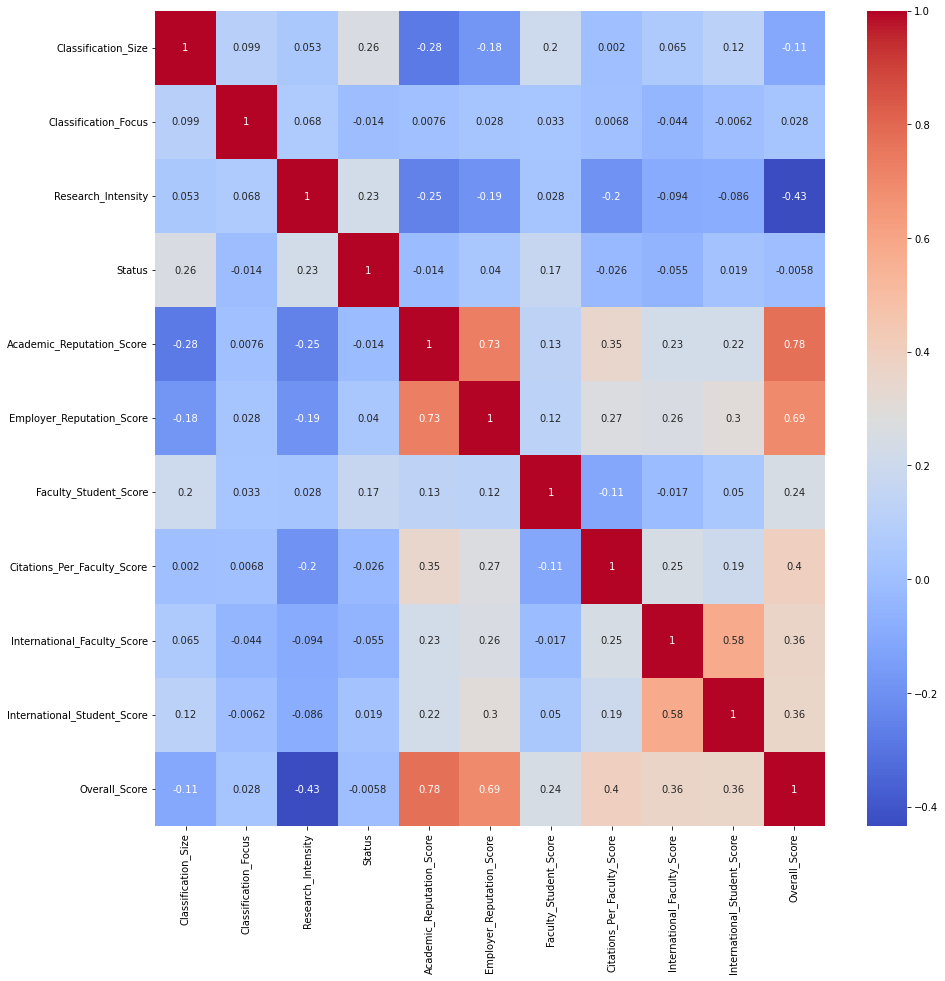

In [185]:
plt.figure(figsize=(15,15))
sns.heatmap(encoded_cat.corr(), cmap='coolwarm', annot=True)
plt.show()

In [186]:
linear = LinearRegression()
dt = DecisionTreeRegressor()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = xgboost.XGBRegressor()
cbt = CatBoostRegressor()
lasso= Lasso()
ridge = Ridge()
models = [linear, dt, gb, rf, xgb, cbt, lasso, ridge]
names =  ['linear', 'dt', 'gb', 'rf', 'xgb', 'cbt', 'lasso', 'ridge']

In [187]:
def evaluate(ytrue, ypred):
    mae = mean_absolute_error(ytrue, ypred)
    rmse = np.sqrt(mean_squared_error(ytrue, ypred))
    r2 = r2_score(ytrue, ypred)
    print('MAE -' , mae)
    print('RMSE -' , rmse)
    print('R2 -' , r2)
    return mae, rmse, r2

In [188]:
X1 = encoded_cat.drop(['Overall_Score'], axis = 1)
y1 = encoded_cat['Overall_Score']

In [189]:
for model in models:
    print(np.mean(np.absolute(cross_val_score(model, X1, y1, cv = 5, scoring = 'neg_mean_absolute_error'))))

10.072615503980478
7.665889341317365
7.173311316298554
6.625724138922157
6.6768041459830885
Learning rate set to 0.045689
0:	learn: 19.0648983	total: 163ms	remaining: 2m 42s
1:	learn: 18.4312242	total: 173ms	remaining: 1m 26s
2:	learn: 17.8786892	total: 180ms	remaining: 59.7s
3:	learn: 17.3322927	total: 186ms	remaining: 46.4s
4:	learn: 16.7784089	total: 193ms	remaining: 38.4s
5:	learn: 16.2535670	total: 199ms	remaining: 33s
6:	learn: 15.7368181	total: 206ms	remaining: 29.2s
7:	learn: 15.2929365	total: 213ms	remaining: 26.4s
8:	learn: 14.8720866	total: 219ms	remaining: 24.1s
9:	learn: 14.4873019	total: 225ms	remaining: 22.3s
10:	learn: 14.0843883	total: 232ms	remaining: 20.8s
11:	learn: 13.7079931	total: 238ms	remaining: 19.6s
12:	learn: 13.3444178	total: 244ms	remaining: 18.5s
13:	learn: 13.0478607	total: 250ms	remaining: 17.6s
14:	learn: 12.7536014	total: 257ms	remaining: 16.9s
15:	learn: 12.4484373	total: 263ms	remaining: 16.2s
16:	learn: 12.1661549	total: 269ms	remaining: 15.6s
17:	

179:	learn: 5.1617722	total: 1.01s	remaining: 4.6s
180:	learn: 5.1543174	total: 1.01s	remaining: 4.59s
181:	learn: 5.1475147	total: 1.02s	remaining: 4.58s
182:	learn: 5.1414303	total: 1.02s	remaining: 4.57s
183:	learn: 5.1349248	total: 1.03s	remaining: 4.56s
184:	learn: 5.1262852	total: 1.03s	remaining: 4.54s
185:	learn: 5.1199486	total: 1.03s	remaining: 4.53s
186:	learn: 5.1114520	total: 1.04s	remaining: 4.52s
187:	learn: 5.1047540	total: 1.04s	remaining: 4.51s
188:	learn: 5.0950155	total: 1.05s	remaining: 4.5s
189:	learn: 5.0887798	total: 1.05s	remaining: 4.49s
190:	learn: 5.0806509	total: 1.06s	remaining: 4.48s
191:	learn: 5.0757073	total: 1.06s	remaining: 4.46s
192:	learn: 5.0690689	total: 1.06s	remaining: 4.45s
193:	learn: 5.0642670	total: 1.07s	remaining: 4.44s
194:	learn: 5.0548728	total: 1.07s	remaining: 4.43s
195:	learn: 5.0494517	total: 1.08s	remaining: 4.43s
196:	learn: 5.0422463	total: 1.08s	remaining: 4.42s
197:	learn: 5.0390216	total: 1.09s	remaining: 4.41s
198:	learn: 5.

342:	learn: 4.2464154	total: 1.71s	remaining: 3.27s
343:	learn: 4.2395188	total: 1.71s	remaining: 3.27s
344:	learn: 4.2362943	total: 1.72s	remaining: 3.26s
345:	learn: 4.2322228	total: 1.72s	remaining: 3.25s
346:	learn: 4.2286102	total: 1.73s	remaining: 3.25s
347:	learn: 4.2217373	total: 1.73s	remaining: 3.24s
348:	learn: 4.2184174	total: 1.73s	remaining: 3.23s
349:	learn: 4.2145079	total: 1.74s	remaining: 3.23s
350:	learn: 4.2098624	total: 1.74s	remaining: 3.22s
351:	learn: 4.2050031	total: 1.75s	remaining: 3.21s
352:	learn: 4.2000355	total: 1.75s	remaining: 3.21s
353:	learn: 4.1954362	total: 1.75s	remaining: 3.2s
354:	learn: 4.1905185	total: 1.76s	remaining: 3.19s
355:	learn: 4.1877596	total: 1.76s	remaining: 3.19s
356:	learn: 4.1825964	total: 1.77s	remaining: 3.18s
357:	learn: 4.1748415	total: 1.77s	remaining: 3.18s
358:	learn: 4.1710313	total: 1.77s	remaining: 3.17s
359:	learn: 4.1663355	total: 1.78s	remaining: 3.16s
360:	learn: 4.1602067	total: 1.78s	remaining: 3.16s
361:	learn: 4

507:	learn: 3.6542177	total: 2.41s	remaining: 2.33s
508:	learn: 3.6510308	total: 2.41s	remaining: 2.33s
509:	learn: 3.6493684	total: 2.42s	remaining: 2.32s
510:	learn: 3.6468373	total: 2.42s	remaining: 2.32s
511:	learn: 3.6436834	total: 2.43s	remaining: 2.31s
512:	learn: 3.6414552	total: 2.43s	remaining: 2.31s
513:	learn: 3.6399813	total: 2.43s	remaining: 2.3s
514:	learn: 3.6382051	total: 2.44s	remaining: 2.3s
515:	learn: 3.6365710	total: 2.44s	remaining: 2.29s
516:	learn: 3.6350825	total: 2.45s	remaining: 2.29s
517:	learn: 3.6325211	total: 2.45s	remaining: 2.28s
518:	learn: 3.6288660	total: 2.46s	remaining: 2.27s
519:	learn: 3.6273005	total: 2.46s	remaining: 2.27s
520:	learn: 3.6259151	total: 2.46s	remaining: 2.27s
521:	learn: 3.6208906	total: 2.47s	remaining: 2.26s
522:	learn: 3.6173452	total: 2.47s	remaining: 2.25s
523:	learn: 3.6152714	total: 2.48s	remaining: 2.25s
524:	learn: 3.6112591	total: 2.48s	remaining: 2.24s
525:	learn: 3.6068692	total: 2.48s	remaining: 2.24s
526:	learn: 3.

671:	learn: 3.2274571	total: 3.11s	remaining: 1.52s
672:	learn: 3.2248734	total: 3.11s	remaining: 1.51s
673:	learn: 3.2219329	total: 3.12s	remaining: 1.51s
674:	learn: 3.2208855	total: 3.12s	remaining: 1.5s
675:	learn: 3.2192838	total: 3.12s	remaining: 1.5s
676:	learn: 3.2176615	total: 3.13s	remaining: 1.49s
677:	learn: 3.2166322	total: 3.13s	remaining: 1.49s
678:	learn: 3.2149121	total: 3.14s	remaining: 1.48s
679:	learn: 3.2143739	total: 3.14s	remaining: 1.48s
680:	learn: 3.2116917	total: 3.14s	remaining: 1.47s
681:	learn: 3.2095688	total: 3.15s	remaining: 1.47s
682:	learn: 3.2077825	total: 3.15s	remaining: 1.46s
683:	learn: 3.2055285	total: 3.16s	remaining: 1.46s
684:	learn: 3.2039366	total: 3.16s	remaining: 1.45s
685:	learn: 3.2019691	total: 3.17s	remaining: 1.45s
686:	learn: 3.2004181	total: 3.17s	remaining: 1.44s
687:	learn: 3.1985788	total: 3.17s	remaining: 1.44s
688:	learn: 3.1977057	total: 3.18s	remaining: 1.43s
689:	learn: 3.1952332	total: 3.18s	remaining: 1.43s
690:	learn: 3.

844:	learn: 2.8700708	total: 3.84s	remaining: 704ms
845:	learn: 2.8673074	total: 3.85s	remaining: 700ms
846:	learn: 2.8656304	total: 3.85s	remaining: 695ms
847:	learn: 2.8637878	total: 3.85s	remaining: 691ms
848:	learn: 2.8622491	total: 3.86s	remaining: 686ms
849:	learn: 2.8601270	total: 3.86s	remaining: 682ms
850:	learn: 2.8589219	total: 3.87s	remaining: 677ms
851:	learn: 2.8577306	total: 3.87s	remaining: 673ms
852:	learn: 2.8560842	total: 3.88s	remaining: 668ms
853:	learn: 2.8538064	total: 3.88s	remaining: 664ms
854:	learn: 2.8516009	total: 3.89s	remaining: 659ms
855:	learn: 2.8507093	total: 3.89s	remaining: 654ms
856:	learn: 2.8484161	total: 3.89s	remaining: 650ms
857:	learn: 2.8468083	total: 3.9s	remaining: 645ms
858:	learn: 2.8453141	total: 3.9s	remaining: 641ms
859:	learn: 2.8424015	total: 3.91s	remaining: 636ms
860:	learn: 2.8406062	total: 3.91s	remaining: 631ms
861:	learn: 2.8398383	total: 3.92s	remaining: 627ms
862:	learn: 2.8387799	total: 3.92s	remaining: 622ms
863:	learn: 2.

39:	learn: 8.3519946	total: 171ms	remaining: 4.11s
40:	learn: 8.2417530	total: 176ms	remaining: 4.12s
41:	learn: 8.1446082	total: 180ms	remaining: 4.11s
42:	learn: 8.0738147	total: 186ms	remaining: 4.14s
43:	learn: 7.9964309	total: 190ms	remaining: 4.13s
44:	learn: 7.9163397	total: 195ms	remaining: 4.13s
45:	learn: 7.8507235	total: 199ms	remaining: 4.13s
46:	learn: 7.7853568	total: 204ms	remaining: 4.13s
47:	learn: 7.7148965	total: 208ms	remaining: 4.13s
48:	learn: 7.6359976	total: 212ms	remaining: 4.12s
49:	learn: 7.5623097	total: 217ms	remaining: 4.11s
50:	learn: 7.4974306	total: 221ms	remaining: 4.11s
51:	learn: 7.4288504	total: 229ms	remaining: 4.17s
52:	learn: 7.3721581	total: 233ms	remaining: 4.17s
53:	learn: 7.3206352	total: 238ms	remaining: 4.16s
54:	learn: 7.2810682	total: 242ms	remaining: 4.15s
55:	learn: 7.2231684	total: 246ms	remaining: 4.14s
56:	learn: 7.1920328	total: 250ms	remaining: 4.13s
57:	learn: 7.1424249	total: 254ms	remaining: 4.13s
58:	learn: 7.0883850	total: 258

203:	learn: 5.2083382	total: 872ms	remaining: 3.4s
204:	learn: 5.2021176	total: 877ms	remaining: 3.4s
205:	learn: 5.1948729	total: 882ms	remaining: 3.4s
206:	learn: 5.1924493	total: 886ms	remaining: 3.39s
207:	learn: 5.1871237	total: 890ms	remaining: 3.39s
208:	learn: 5.1808881	total: 895ms	remaining: 3.39s
209:	learn: 5.1736144	total: 899ms	remaining: 3.38s
210:	learn: 5.1607523	total: 904ms	remaining: 3.38s
211:	learn: 5.1571451	total: 908ms	remaining: 3.37s
212:	learn: 5.1523847	total: 912ms	remaining: 3.37s
213:	learn: 5.1456863	total: 916ms	remaining: 3.37s
214:	learn: 5.1400133	total: 921ms	remaining: 3.36s
215:	learn: 5.1354742	total: 925ms	remaining: 3.36s
216:	learn: 5.1280999	total: 929ms	remaining: 3.35s
217:	learn: 5.1241075	total: 934ms	remaining: 3.35s
218:	learn: 5.1199080	total: 938ms	remaining: 3.35s
219:	learn: 5.1136954	total: 942ms	remaining: 3.34s
220:	learn: 5.1102385	total: 947ms	remaining: 3.34s
221:	learn: 5.1068509	total: 951ms	remaining: 3.33s
222:	learn: 5.1

364:	learn: 4.3905631	total: 1.57s	remaining: 2.73s
365:	learn: 4.3882295	total: 1.57s	remaining: 2.73s
366:	learn: 4.3864016	total: 1.58s	remaining: 2.72s
367:	learn: 4.3831218	total: 1.58s	remaining: 2.72s
368:	learn: 4.3781111	total: 1.59s	remaining: 2.71s
369:	learn: 4.3755870	total: 1.59s	remaining: 2.71s
370:	learn: 4.3716796	total: 1.59s	remaining: 2.71s
371:	learn: 4.3678846	total: 1.6s	remaining: 2.7s
372:	learn: 4.3645411	total: 1.6s	remaining: 2.7s
373:	learn: 4.3595223	total: 1.61s	remaining: 2.69s
374:	learn: 4.3557837	total: 1.61s	remaining: 2.69s
375:	learn: 4.3524725	total: 1.62s	remaining: 2.68s
376:	learn: 4.3489164	total: 1.62s	remaining: 2.68s
377:	learn: 4.3471146	total: 1.63s	remaining: 2.67s
378:	learn: 4.3430329	total: 1.63s	remaining: 2.67s
379:	learn: 4.3389592	total: 1.63s	remaining: 2.67s
380:	learn: 4.3350727	total: 1.64s	remaining: 2.66s
381:	learn: 4.3312716	total: 1.64s	remaining: 2.66s
382:	learn: 4.3287815	total: 1.65s	remaining: 2.65s
383:	learn: 4.32

529:	learn: 3.8569487	total: 2.27s	remaining: 2.01s
530:	learn: 3.8552347	total: 2.28s	remaining: 2.01s
531:	learn: 3.8531160	total: 2.28s	remaining: 2.01s
532:	learn: 3.8504750	total: 2.29s	remaining: 2s
533:	learn: 3.8465625	total: 2.29s	remaining: 2s
534:	learn: 3.8417463	total: 2.29s	remaining: 1.99s
535:	learn: 3.8396253	total: 2.3s	remaining: 1.99s
536:	learn: 3.8350916	total: 2.3s	remaining: 1.98s
537:	learn: 3.8336033	total: 2.31s	remaining: 1.98s
538:	learn: 3.8315822	total: 2.31s	remaining: 1.98s
539:	learn: 3.8294591	total: 2.31s	remaining: 1.97s
540:	learn: 3.8277598	total: 2.32s	remaining: 1.97s
541:	learn: 3.8232691	total: 2.32s	remaining: 1.96s
542:	learn: 3.8214778	total: 2.33s	remaining: 1.96s
543:	learn: 3.8209209	total: 2.33s	remaining: 1.95s
544:	learn: 3.8184866	total: 2.33s	remaining: 1.95s
545:	learn: 3.8154797	total: 2.34s	remaining: 1.95s
546:	learn: 3.8141029	total: 2.34s	remaining: 1.94s
547:	learn: 3.8106862	total: 2.35s	remaining: 1.94s
548:	learn: 3.808069

691:	learn: 3.4656576	total: 2.96s	remaining: 1.32s
692:	learn: 3.4636737	total: 2.96s	remaining: 1.31s
693:	learn: 3.4604682	total: 2.97s	remaining: 1.31s
694:	learn: 3.4588211	total: 2.97s	remaining: 1.3s
695:	learn: 3.4558825	total: 2.97s	remaining: 1.3s
696:	learn: 3.4546264	total: 2.98s	remaining: 1.29s
697:	learn: 3.4519238	total: 2.98s	remaining: 1.29s
698:	learn: 3.4505323	total: 2.99s	remaining: 1.29s
699:	learn: 3.4491187	total: 2.99s	remaining: 1.28s
700:	learn: 3.4473409	total: 3s	remaining: 1.28s
701:	learn: 3.4433158	total: 3s	remaining: 1.27s
702:	learn: 3.4401941	total: 3s	remaining: 1.27s
703:	learn: 3.4384631	total: 3.01s	remaining: 1.26s
704:	learn: 3.4361422	total: 3.02s	remaining: 1.26s
705:	learn: 3.4332699	total: 3.02s	remaining: 1.26s
706:	learn: 3.4317823	total: 3.02s	remaining: 1.25s
707:	learn: 3.4293557	total: 3.03s	remaining: 1.25s
708:	learn: 3.4274632	total: 3.03s	remaining: 1.24s
709:	learn: 3.4231342	total: 3.04s	remaining: 1.24s
710:	learn: 3.4201634	t

855:	learn: 3.1251627	total: 3.66s	remaining: 615ms
856:	learn: 3.1239511	total: 3.66s	remaining: 611ms
857:	learn: 3.1210706	total: 3.67s	remaining: 607ms
858:	learn: 3.1197583	total: 3.67s	remaining: 603ms
859:	learn: 3.1182026	total: 3.67s	remaining: 598ms
860:	learn: 3.1163741	total: 3.68s	remaining: 594ms
861:	learn: 3.1150120	total: 3.68s	remaining: 590ms
862:	learn: 3.1123507	total: 3.69s	remaining: 585ms
863:	learn: 3.1106334	total: 3.69s	remaining: 581ms
864:	learn: 3.1097445	total: 3.69s	remaining: 577ms
865:	learn: 3.1078545	total: 3.7s	remaining: 573ms
866:	learn: 3.1058182	total: 3.7s	remaining: 568ms
867:	learn: 3.1041425	total: 3.71s	remaining: 564ms
868:	learn: 3.1023979	total: 3.71s	remaining: 560ms
869:	learn: 3.1009088	total: 3.72s	remaining: 555ms
870:	learn: 3.0991640	total: 3.72s	remaining: 551ms
871:	learn: 3.0967468	total: 3.73s	remaining: 547ms
872:	learn: 3.0949408	total: 3.73s	remaining: 543ms
873:	learn: 3.0939997	total: 3.73s	remaining: 538ms
874:	learn: 3.

40:	learn: 6.8626636	total: 173ms	remaining: 4.04s
41:	learn: 6.7507443	total: 177ms	remaining: 4.04s
42:	learn: 6.6445317	total: 182ms	remaining: 4.04s
43:	learn: 6.5449932	total: 186ms	remaining: 4.04s
44:	learn: 6.4507874	total: 190ms	remaining: 4.04s
45:	learn: 6.3561677	total: 194ms	remaining: 4.03s
46:	learn: 6.2767460	total: 199ms	remaining: 4.03s
47:	learn: 6.2103892	total: 203ms	remaining: 4.03s
48:	learn: 6.1220248	total: 207ms	remaining: 4.02s
49:	learn: 6.0499303	total: 211ms	remaining: 4.02s
50:	learn: 5.9698022	total: 216ms	remaining: 4.01s
51:	learn: 5.9013992	total: 220ms	remaining: 4.01s
52:	learn: 5.8537101	total: 224ms	remaining: 4s
53:	learn: 5.7943222	total: 228ms	remaining: 4s
54:	learn: 5.7456545	total: 232ms	remaining: 3.99s
55:	learn: 5.6843951	total: 237ms	remaining: 3.99s
56:	learn: 5.6423509	total: 241ms	remaining: 3.98s
57:	learn: 5.5734945	total: 245ms	remaining: 3.98s
58:	learn: 5.5145923	total: 249ms	remaining: 3.97s
59:	learn: 5.4577768	total: 253ms	rem

204:	learn: 3.6939350	total: 873ms	remaining: 3.39s
205:	learn: 3.6878688	total: 878ms	remaining: 3.38s
206:	learn: 3.6811730	total: 883ms	remaining: 3.38s
207:	learn: 3.6736140	total: 887ms	remaining: 3.38s
208:	learn: 3.6716114	total: 891ms	remaining: 3.37s
209:	learn: 3.6669635	total: 896ms	remaining: 3.37s
210:	learn: 3.6575281	total: 900ms	remaining: 3.37s
211:	learn: 3.6533315	total: 905ms	remaining: 3.36s
212:	learn: 3.6489428	total: 910ms	remaining: 3.36s
213:	learn: 3.6455398	total: 914ms	remaining: 3.36s
214:	learn: 3.6379177	total: 918ms	remaining: 3.35s
215:	learn: 3.6352062	total: 922ms	remaining: 3.35s
216:	learn: 3.6284962	total: 927ms	remaining: 3.34s
217:	learn: 3.6214077	total: 931ms	remaining: 3.34s
218:	learn: 3.6153474	total: 936ms	remaining: 3.34s
219:	learn: 3.6081229	total: 940ms	remaining: 3.33s
220:	learn: 3.6043409	total: 944ms	remaining: 3.33s
221:	learn: 3.6001114	total: 950ms	remaining: 3.33s
222:	learn: 3.5930698	total: 954ms	remaining: 3.33s
223:	learn: 

365:	learn: 2.9521053	total: 1.57s	remaining: 2.72s
366:	learn: 2.9487547	total: 1.57s	remaining: 2.71s
367:	learn: 2.9439882	total: 1.58s	remaining: 2.71s
368:	learn: 2.9384131	total: 1.58s	remaining: 2.71s
369:	learn: 2.9347194	total: 1.59s	remaining: 2.7s
370:	learn: 2.9335922	total: 1.59s	remaining: 2.7s
371:	learn: 2.9301196	total: 1.6s	remaining: 2.69s
372:	learn: 2.9285414	total: 1.6s	remaining: 2.69s
373:	learn: 2.9266626	total: 1.6s	remaining: 2.69s
374:	learn: 2.9256433	total: 1.61s	remaining: 2.68s
375:	learn: 2.9232287	total: 1.61s	remaining: 2.68s
376:	learn: 2.9199645	total: 1.62s	remaining: 2.67s
377:	learn: 2.9181509	total: 1.62s	remaining: 2.67s
378:	learn: 2.9160420	total: 1.63s	remaining: 2.67s
379:	learn: 2.9135694	total: 1.63s	remaining: 2.66s
380:	learn: 2.9096836	total: 1.64s	remaining: 2.66s
381:	learn: 2.9066272	total: 1.64s	remaining: 2.65s
382:	learn: 2.9047029	total: 1.64s	remaining: 2.65s
383:	learn: 2.9017820	total: 1.65s	remaining: 2.64s
384:	learn: 2.897

529:	learn: 2.4971457	total: 2.27s	remaining: 2.01s
530:	learn: 2.4934857	total: 2.27s	remaining: 2.01s
531:	learn: 2.4916771	total: 2.28s	remaining: 2s
532:	learn: 2.4894015	total: 2.28s	remaining: 2s
533:	learn: 2.4843803	total: 2.29s	remaining: 2s
534:	learn: 2.4808285	total: 2.29s	remaining: 1.99s
535:	learn: 2.4796037	total: 2.3s	remaining: 1.99s
536:	learn: 2.4768682	total: 2.3s	remaining: 1.98s
537:	learn: 2.4753305	total: 2.3s	remaining: 1.98s
538:	learn: 2.4737805	total: 2.31s	remaining: 1.97s
539:	learn: 2.4709103	total: 2.31s	remaining: 1.97s
540:	learn: 2.4694109	total: 2.32s	remaining: 1.97s
541:	learn: 2.4666349	total: 2.32s	remaining: 1.96s
542:	learn: 2.4641009	total: 2.33s	remaining: 1.96s
543:	learn: 2.4630246	total: 2.33s	remaining: 1.95s
544:	learn: 2.4610955	total: 2.33s	remaining: 1.95s
545:	learn: 2.4577621	total: 2.34s	remaining: 1.94s
546:	learn: 2.4546999	total: 2.34s	remaining: 1.94s
547:	learn: 2.4534607	total: 2.35s	remaining: 1.94s
548:	learn: 2.4507212	to

690:	learn: 2.1417115	total: 2.97s	remaining: 1.33s
691:	learn: 2.1394627	total: 2.98s	remaining: 1.32s
692:	learn: 2.1390615	total: 2.98s	remaining: 1.32s
693:	learn: 2.1378963	total: 2.98s	remaining: 1.31s
694:	learn: 2.1366072	total: 2.99s	remaining: 1.31s
695:	learn: 2.1355797	total: 2.99s	remaining: 1.31s
696:	learn: 2.1346964	total: 3s	remaining: 1.3s
697:	learn: 2.1333682	total: 3s	remaining: 1.3s
698:	learn: 2.1310743	total: 3s	remaining: 1.29s
699:	learn: 2.1300335	total: 3.01s	remaining: 1.29s
700:	learn: 2.1277491	total: 3.01s	remaining: 1.28s
701:	learn: 2.1253934	total: 3.02s	remaining: 1.28s
702:	learn: 2.1240955	total: 3.02s	remaining: 1.28s
703:	learn: 2.1225872	total: 3.02s	remaining: 1.27s
704:	learn: 2.1211156	total: 3.03s	remaining: 1.27s
705:	learn: 2.1191069	total: 3.03s	remaining: 1.26s
706:	learn: 2.1164295	total: 3.04s	remaining: 1.26s
707:	learn: 2.1147771	total: 3.04s	remaining: 1.25s
708:	learn: 2.1137353	total: 3.05s	remaining: 1.25s
709:	learn: 2.1122930	t

854:	learn: 1.8974849	total: 3.67s	remaining: 622ms
855:	learn: 1.8956241	total: 3.67s	remaining: 618ms
856:	learn: 1.8939422	total: 3.68s	remaining: 614ms
857:	learn: 1.8933698	total: 3.68s	remaining: 610ms
858:	learn: 1.8917281	total: 3.69s	remaining: 605ms
859:	learn: 1.8905289	total: 3.69s	remaining: 601ms
860:	learn: 1.8880698	total: 3.69s	remaining: 597ms
861:	learn: 1.8874011	total: 3.7s	remaining: 592ms
862:	learn: 1.8869647	total: 3.7s	remaining: 588ms
863:	learn: 1.8858794	total: 3.71s	remaining: 584ms
864:	learn: 1.8848168	total: 3.71s	remaining: 579ms
865:	learn: 1.8836467	total: 3.72s	remaining: 575ms
866:	learn: 1.8830000	total: 3.72s	remaining: 571ms
867:	learn: 1.8810509	total: 3.73s	remaining: 567ms
868:	learn: 1.8792305	total: 3.73s	remaining: 562ms
869:	learn: 1.8772709	total: 3.73s	remaining: 558ms
870:	learn: 1.8747639	total: 3.74s	remaining: 554ms
871:	learn: 1.8738032	total: 3.74s	remaining: 549ms
872:	learn: 1.8719235	total: 3.75s	remaining: 545ms
873:	learn: 1.

41:	learn: 8.1415715	total: 178ms	remaining: 4.05s
42:	learn: 8.0601232	total: 182ms	remaining: 4.06s
43:	learn: 7.9956977	total: 187ms	remaining: 4.05s
44:	learn: 7.9130591	total: 191ms	remaining: 4.05s
45:	learn: 7.8438750	total: 195ms	remaining: 4.05s
46:	learn: 7.7751617	total: 200ms	remaining: 4.04s
47:	learn: 7.7063395	total: 204ms	remaining: 4.04s
48:	learn: 7.6372969	total: 208ms	remaining: 4.04s
49:	learn: 7.5731255	total: 212ms	remaining: 4.03s
50:	learn: 7.5120057	total: 216ms	remaining: 4.03s
51:	learn: 7.4488057	total: 221ms	remaining: 4.02s
52:	learn: 7.3930559	total: 225ms	remaining: 4.02s
53:	learn: 7.3349961	total: 229ms	remaining: 4.01s
54:	learn: 7.2947256	total: 233ms	remaining: 4s
55:	learn: 7.2463818	total: 237ms	remaining: 4s
56:	learn: 7.2049391	total: 241ms	remaining: 3.99s
57:	learn: 7.1541344	total: 246ms	remaining: 3.99s
58:	learn: 7.1074454	total: 250ms	remaining: 3.98s
59:	learn: 7.0616555	total: 254ms	remaining: 3.98s
60:	learn: 7.0098227	total: 258ms	rem

205:	learn: 5.1341295	total: 875ms	remaining: 3.37s
206:	learn: 5.1283023	total: 880ms	remaining: 3.37s
207:	learn: 5.1232043	total: 884ms	remaining: 3.37s
208:	learn: 5.1142370	total: 889ms	remaining: 3.36s
209:	learn: 5.1097425	total: 893ms	remaining: 3.36s
210:	learn: 5.1045218	total: 897ms	remaining: 3.35s
211:	learn: 5.0970718	total: 902ms	remaining: 3.35s
212:	learn: 5.0905580	total: 906ms	remaining: 3.35s
213:	learn: 5.0847285	total: 911ms	remaining: 3.34s
214:	learn: 5.0799111	total: 915ms	remaining: 3.34s
215:	learn: 5.0732924	total: 919ms	remaining: 3.34s
216:	learn: 5.0656542	total: 924ms	remaining: 3.33s
217:	learn: 5.0582951	total: 929ms	remaining: 3.33s
218:	learn: 5.0539371	total: 933ms	remaining: 3.33s
219:	learn: 5.0477653	total: 937ms	remaining: 3.32s
220:	learn: 5.0402705	total: 942ms	remaining: 3.32s
221:	learn: 5.0312841	total: 946ms	remaining: 3.31s
222:	learn: 5.0252649	total: 951ms	remaining: 3.31s
223:	learn: 5.0208735	total: 955ms	remaining: 3.31s
224:	learn: 

365:	learn: 4.3191465	total: 1.56s	remaining: 2.7s
366:	learn: 4.3157202	total: 1.56s	remaining: 2.7s
367:	learn: 4.3073928	total: 1.57s	remaining: 2.69s
368:	learn: 4.3009011	total: 1.57s	remaining: 2.69s
369:	learn: 4.2978661	total: 1.58s	remaining: 2.69s
370:	learn: 4.2942494	total: 1.58s	remaining: 2.68s
371:	learn: 4.2908573	total: 1.58s	remaining: 2.68s
372:	learn: 4.2884160	total: 1.59s	remaining: 2.67s
373:	learn: 4.2849045	total: 1.59s	remaining: 2.67s
374:	learn: 4.2821342	total: 1.6s	remaining: 2.66s
375:	learn: 4.2796354	total: 1.6s	remaining: 2.66s
376:	learn: 4.2756171	total: 1.61s	remaining: 2.65s
377:	learn: 4.2698471	total: 1.61s	remaining: 2.65s
378:	learn: 4.2668581	total: 1.61s	remaining: 2.65s
379:	learn: 4.2635573	total: 1.62s	remaining: 2.64s
380:	learn: 4.2598216	total: 1.62s	remaining: 2.64s
381:	learn: 4.2564322	total: 1.63s	remaining: 2.63s
382:	learn: 4.2527360	total: 1.63s	remaining: 2.63s
383:	learn: 4.2473357	total: 1.64s	remaining: 2.62s
384:	learn: 4.24

530:	learn: 3.7809165	total: 2.26s	remaining: 2s
531:	learn: 3.7784326	total: 2.26s	remaining: 1.99s
532:	learn: 3.7714398	total: 2.27s	remaining: 1.99s
533:	learn: 3.7692809	total: 2.27s	remaining: 1.98s
534:	learn: 3.7646761	total: 2.28s	remaining: 1.98s
535:	learn: 3.7611625	total: 2.28s	remaining: 1.97s
536:	learn: 3.7591644	total: 2.28s	remaining: 1.97s
537:	learn: 3.7555260	total: 2.29s	remaining: 1.97s
538:	learn: 3.7517775	total: 2.29s	remaining: 1.96s
539:	learn: 3.7493872	total: 2.3s	remaining: 1.96s
540:	learn: 3.7460907	total: 2.3s	remaining: 1.95s
541:	learn: 3.7432713	total: 2.31s	remaining: 1.95s
542:	learn: 3.7382223	total: 2.31s	remaining: 1.94s
543:	learn: 3.7356769	total: 2.31s	remaining: 1.94s
544:	learn: 3.7339280	total: 2.32s	remaining: 1.94s
545:	learn: 3.7310805	total: 2.32s	remaining: 1.93s
546:	learn: 3.7295222	total: 2.33s	remaining: 1.93s
547:	learn: 3.7275758	total: 2.33s	remaining: 1.92s
548:	learn: 3.7266293	total: 2.33s	remaining: 1.92s
549:	learn: 3.722

696:	learn: 3.3540356	total: 2.96s	remaining: 1.29s
697:	learn: 3.3514008	total: 2.97s	remaining: 1.28s
698:	learn: 3.3489971	total: 2.97s	remaining: 1.28s
699:	learn: 3.3470936	total: 2.98s	remaining: 1.27s
700:	learn: 3.3448267	total: 2.98s	remaining: 1.27s
701:	learn: 3.3414359	total: 2.98s	remaining: 1.27s
702:	learn: 3.3398618	total: 2.99s	remaining: 1.26s
703:	learn: 3.3383456	total: 2.99s	remaining: 1.26s
704:	learn: 3.3350005	total: 3s	remaining: 1.25s
705:	learn: 3.3337638	total: 3s	remaining: 1.25s
706:	learn: 3.3314273	total: 3s	remaining: 1.25s
707:	learn: 3.3286808	total: 3.01s	remaining: 1.24s
708:	learn: 3.3267715	total: 3.01s	remaining: 1.24s
709:	learn: 3.3234747	total: 3.02s	remaining: 1.23s
710:	learn: 3.3223816	total: 3.02s	remaining: 1.23s
711:	learn: 3.3205984	total: 3.03s	remaining: 1.22s
712:	learn: 3.3182369	total: 3.03s	remaining: 1.22s
713:	learn: 3.3147637	total: 3.04s	remaining: 1.22s
714:	learn: 3.3131004	total: 3.04s	remaining: 1.21s
715:	learn: 3.3118953

860:	learn: 3.0003936	total: 3.66s	remaining: 591ms
861:	learn: 2.9984613	total: 3.67s	remaining: 587ms
862:	learn: 2.9955776	total: 3.67s	remaining: 583ms
863:	learn: 2.9937736	total: 3.67s	remaining: 578ms
864:	learn: 2.9921435	total: 3.68s	remaining: 574ms
865:	learn: 2.9899537	total: 3.68s	remaining: 570ms
866:	learn: 2.9871057	total: 3.69s	remaining: 566ms
867:	learn: 2.9850525	total: 3.69s	remaining: 561ms
868:	learn: 2.9824920	total: 3.7s	remaining: 557ms
869:	learn: 2.9804479	total: 3.7s	remaining: 553ms
870:	learn: 2.9783380	total: 3.7s	remaining: 549ms
871:	learn: 2.9764243	total: 3.71s	remaining: 544ms
872:	learn: 2.9732376	total: 3.71s	remaining: 540ms
873:	learn: 2.9707894	total: 3.72s	remaining: 536ms
874:	learn: 2.9684441	total: 3.72s	remaining: 532ms
875:	learn: 2.9671023	total: 3.73s	remaining: 528ms
876:	learn: 2.9657409	total: 3.73s	remaining: 523ms
877:	learn: 2.9643301	total: 3.74s	remaining: 519ms
878:	learn: 2.9621805	total: 3.74s	remaining: 515ms
879:	learn: 2.9

48:	learn: 7.4511370	total: 214ms	remaining: 4.16s
49:	learn: 7.3822118	total: 219ms	remaining: 4.16s
50:	learn: 7.3101240	total: 223ms	remaining: 4.15s
51:	learn: 7.2361152	total: 227ms	remaining: 4.14s
52:	learn: 7.1866749	total: 231ms	remaining: 4.13s
53:	learn: 7.1332509	total: 235ms	remaining: 4.12s
54:	learn: 7.0930429	total: 240ms	remaining: 4.12s
55:	learn: 7.0433287	total: 244ms	remaining: 4.11s
56:	learn: 7.0020038	total: 248ms	remaining: 4.1s
57:	learn: 6.9431143	total: 252ms	remaining: 4.09s
58:	learn: 6.8914403	total: 256ms	remaining: 4.09s
59:	learn: 6.8379539	total: 261ms	remaining: 4.08s
60:	learn: 6.7873115	total: 265ms	remaining: 4.08s
61:	learn: 6.7502959	total: 269ms	remaining: 4.07s
62:	learn: 6.7220138	total: 273ms	remaining: 4.06s
63:	learn: 6.6927961	total: 277ms	remaining: 4.05s
64:	learn: 6.6584689	total: 281ms	remaining: 4.05s
65:	learn: 6.6244074	total: 286ms	remaining: 4.04s
66:	learn: 6.5959545	total: 290ms	remaining: 4.03s
67:	learn: 6.5655258	total: 294m

208:	learn: 4.8180128	total: 901ms	remaining: 3.41s
209:	learn: 4.8065599	total: 906ms	remaining: 3.41s
210:	learn: 4.8004037	total: 910ms	remaining: 3.4s
211:	learn: 4.7952435	total: 914ms	remaining: 3.4s
212:	learn: 4.7871188	total: 919ms	remaining: 3.4s
213:	learn: 4.7761968	total: 923ms	remaining: 3.39s
214:	learn: 4.7689982	total: 928ms	remaining: 3.39s
215:	learn: 4.7611999	total: 932ms	remaining: 3.38s
216:	learn: 4.7568374	total: 937ms	remaining: 3.38s
217:	learn: 4.7517300	total: 941ms	remaining: 3.38s
218:	learn: 4.7454049	total: 945ms	remaining: 3.37s
219:	learn: 4.7366381	total: 950ms	remaining: 3.37s
220:	learn: 4.7259288	total: 954ms	remaining: 3.36s
221:	learn: 4.7193110	total: 959ms	remaining: 3.36s
222:	learn: 4.7141791	total: 963ms	remaining: 3.35s
223:	learn: 4.7011750	total: 967ms	remaining: 3.35s
224:	learn: 4.6931378	total: 972ms	remaining: 3.35s
225:	learn: 4.6843400	total: 978ms	remaining: 3.35s
226:	learn: 4.6783738	total: 983ms	remaining: 3.35s
227:	learn: 4.6

406:	learn: 3.7873324	total: 1.77s	remaining: 2.58s
407:	learn: 3.7847245	total: 1.78s	remaining: 2.58s
408:	learn: 3.7796875	total: 1.79s	remaining: 2.58s
409:	learn: 3.7766483	total: 1.79s	remaining: 2.58s
410:	learn: 3.7717092	total: 1.79s	remaining: 2.57s
411:	learn: 3.7692214	total: 1.8s	remaining: 2.57s
412:	learn: 3.7659518	total: 1.8s	remaining: 2.56s
413:	learn: 3.7632926	total: 1.81s	remaining: 2.56s
414:	learn: 3.7594209	total: 1.81s	remaining: 2.55s
415:	learn: 3.7561838	total: 1.82s	remaining: 2.55s
416:	learn: 3.7505267	total: 1.82s	remaining: 2.54s
417:	learn: 3.7460235	total: 1.82s	remaining: 2.54s
418:	learn: 3.7427258	total: 1.83s	remaining: 2.54s
419:	learn: 3.7381265	total: 1.83s	remaining: 2.53s
420:	learn: 3.7349253	total: 1.84s	remaining: 2.53s
421:	learn: 3.7311949	total: 1.84s	remaining: 2.52s
422:	learn: 3.7287966	total: 1.84s	remaining: 2.52s
423:	learn: 3.7264635	total: 1.85s	remaining: 2.51s
424:	learn: 3.7192133	total: 1.85s	remaining: 2.51s
425:	learn: 3.

568:	learn: 3.2819696	total: 2.48s	remaining: 1.88s
569:	learn: 3.2790974	total: 2.48s	remaining: 1.87s
570:	learn: 3.2768494	total: 2.49s	remaining: 1.87s
571:	learn: 3.2744525	total: 2.49s	remaining: 1.86s
572:	learn: 3.2719566	total: 2.5s	remaining: 1.86s
573:	learn: 3.2703735	total: 2.5s	remaining: 1.85s
574:	learn: 3.2671158	total: 2.5s	remaining: 1.85s
575:	learn: 3.2645109	total: 2.51s	remaining: 1.85s
576:	learn: 3.2622316	total: 2.51s	remaining: 1.84s
577:	learn: 3.2589507	total: 2.52s	remaining: 1.84s
578:	learn: 3.2562754	total: 2.52s	remaining: 1.83s
579:	learn: 3.2540097	total: 2.52s	remaining: 1.83s
580:	learn: 3.2524409	total: 2.53s	remaining: 1.82s
581:	learn: 3.2487882	total: 2.53s	remaining: 1.82s
582:	learn: 3.2440042	total: 2.54s	remaining: 1.81s
583:	learn: 3.2410708	total: 2.54s	remaining: 1.81s
584:	learn: 3.2396563	total: 2.55s	remaining: 1.81s
585:	learn: 3.2376070	total: 2.55s	remaining: 1.8s
586:	learn: 3.2350258	total: 2.55s	remaining: 1.8s
587:	learn: 3.231

730:	learn: 2.9104122	total: 3.17s	remaining: 1.17s
731:	learn: 2.9093529	total: 3.17s	remaining: 1.16s
732:	learn: 2.9063876	total: 3.18s	remaining: 1.16s
733:	learn: 2.9012562	total: 3.18s	remaining: 1.15s
734:	learn: 2.8993367	total: 3.19s	remaining: 1.15s
735:	learn: 2.8967753	total: 3.19s	remaining: 1.14s
736:	learn: 2.8942660	total: 3.19s	remaining: 1.14s
737:	learn: 2.8923381	total: 3.2s	remaining: 1.14s
738:	learn: 2.8893273	total: 3.2s	remaining: 1.13s
739:	learn: 2.8881453	total: 3.21s	remaining: 1.13s
740:	learn: 2.8872408	total: 3.21s	remaining: 1.12s
741:	learn: 2.8864365	total: 3.22s	remaining: 1.12s
742:	learn: 2.8841225	total: 3.22s	remaining: 1.11s
743:	learn: 2.8820888	total: 3.22s	remaining: 1.11s
744:	learn: 2.8800315	total: 3.23s	remaining: 1.1s
745:	learn: 2.8785504	total: 3.23s	remaining: 1.1s
746:	learn: 2.8764144	total: 3.24s	remaining: 1.1s
747:	learn: 2.8743294	total: 3.24s	remaining: 1.09s
748:	learn: 2.8714617	total: 3.25s	remaining: 1.09s
749:	learn: 2.868

901:	learn: 2.5983030	total: 3.89s	remaining: 423ms
902:	learn: 2.5972582	total: 3.9s	remaining: 419ms
903:	learn: 2.5966180	total: 3.9s	remaining: 414ms
904:	learn: 2.5949238	total: 3.91s	remaining: 410ms
905:	learn: 2.5925296	total: 3.91s	remaining: 406ms
906:	learn: 2.5916697	total: 3.92s	remaining: 401ms
907:	learn: 2.5911934	total: 3.92s	remaining: 397ms
908:	learn: 2.5886626	total: 3.92s	remaining: 393ms
909:	learn: 2.5879471	total: 3.93s	remaining: 388ms
910:	learn: 2.5862761	total: 3.93s	remaining: 384ms
911:	learn: 2.5854856	total: 3.94s	remaining: 380ms
912:	learn: 2.5851743	total: 3.94s	remaining: 376ms
913:	learn: 2.5819036	total: 3.94s	remaining: 371ms
914:	learn: 2.5801493	total: 3.95s	remaining: 367ms
915:	learn: 2.5780273	total: 3.95s	remaining: 363ms
916:	learn: 2.5773939	total: 3.96s	remaining: 358ms
917:	learn: 2.5770303	total: 3.96s	remaining: 354ms
918:	learn: 2.5757508	total: 3.96s	remaining: 350ms
919:	learn: 2.5748012	total: 3.97s	remaining: 345ms
920:	learn: 2.

In [190]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X1, y1, test_size = 0.3)

In [192]:
res1 = {}
for i in range(len(models)):
    a = models[i].fit(Xtrain1, ytrain1)
    ypreds1 = a.predict(Xtest1)
    print(names[i])
    b = evaluate(ytest1, ypreds1)
    res1[names[i]] = b

linear
MAE - 7.7136093181708585
RMSE - 9.628104612940014
R2 - 0.7799392628322106
dt
MAE - 5.05525965379494
RMSE - 7.894550531592801
R2 - 0.8520497237216866
gb
MAE - 4.560094686729889
RMSE - 6.18182680565121
R2 - 0.909281757191381
rf
MAE - 3.82842743009321
RMSE - 5.90279838429586
R2 - 0.9172864116600515
xgb
MAE - 4.237469009426081
RMSE - 6.052535370035224
R2 - 0.9130367754513992
Learning rate set to 0.044736
0:	learn: 20.0297226	total: 4.63ms	remaining: 4.63s
1:	learn: 19.3758670	total: 9.03ms	remaining: 4.5s
2:	learn: 18.7984369	total: 13.3ms	remaining: 4.43s
3:	learn: 18.2244578	total: 19.6ms	remaining: 4.88s
4:	learn: 17.6761892	total: 24.1ms	remaining: 4.79s
5:	learn: 17.1341884	total: 28.4ms	remaining: 4.7s
6:	learn: 16.6089650	total: 32.7ms	remaining: 4.64s
7:	learn: 16.1399306	total: 37.2ms	remaining: 4.62s
8:	learn: 15.6950563	total: 41.6ms	remaining: 4.58s
9:	learn: 15.2626788	total: 46.1ms	remaining: 4.56s
10:	learn: 14.8353643	total: 50.5ms	remaining: 4.54s
11:	learn: 14.4333

171:	learn: 5.2436206	total: 816ms	remaining: 3.93s
172:	learn: 5.2276458	total: 820ms	remaining: 3.92s
173:	learn: 5.2221388	total: 825ms	remaining: 3.92s
174:	learn: 5.2124022	total: 830ms	remaining: 3.91s
175:	learn: 5.2088208	total: 836ms	remaining: 3.91s
176:	learn: 5.1989253	total: 840ms	remaining: 3.9s
177:	learn: 5.1946890	total: 844ms	remaining: 3.9s
178:	learn: 5.1827998	total: 849ms	remaining: 3.89s
179:	learn: 5.1692010	total: 853ms	remaining: 3.89s
180:	learn: 5.1563105	total: 857ms	remaining: 3.88s
181:	learn: 5.1508374	total: 862ms	remaining: 3.87s
182:	learn: 5.1397175	total: 868ms	remaining: 3.87s
183:	learn: 5.1304731	total: 872ms	remaining: 3.87s
184:	learn: 5.1240389	total: 876ms	remaining: 3.86s
185:	learn: 5.1174263	total: 881ms	remaining: 3.85s
186:	learn: 5.1088091	total: 885ms	remaining: 3.85s
187:	learn: 5.1015572	total: 889ms	remaining: 3.84s
188:	learn: 5.0959254	total: 894ms	remaining: 3.84s
189:	learn: 5.0902477	total: 900ms	remaining: 3.83s
190:	learn: 5.

348:	learn: 4.1665826	total: 1.69s	remaining: 3.15s
349:	learn: 4.1631552	total: 1.69s	remaining: 3.14s
350:	learn: 4.1588070	total: 1.7s	remaining: 3.14s
351:	learn: 4.1550782	total: 1.7s	remaining: 3.13s
352:	learn: 4.1503456	total: 1.71s	remaining: 3.13s
353:	learn: 4.1448408	total: 1.71s	remaining: 3.12s
354:	learn: 4.1425842	total: 1.72s	remaining: 3.12s
355:	learn: 4.1390421	total: 1.72s	remaining: 3.11s
356:	learn: 4.1323774	total: 1.72s	remaining: 3.11s
357:	learn: 4.1270070	total: 1.73s	remaining: 3.1s
358:	learn: 4.1202602	total: 1.74s	remaining: 3.1s
359:	learn: 4.1160776	total: 1.74s	remaining: 3.09s
360:	learn: 4.1091395	total: 1.74s	remaining: 3.09s
361:	learn: 4.1069783	total: 1.75s	remaining: 3.08s
362:	learn: 4.1021436	total: 1.75s	remaining: 3.08s
363:	learn: 4.0984560	total: 1.76s	remaining: 3.07s
364:	learn: 4.0938138	total: 1.76s	remaining: 3.06s
365:	learn: 4.0898615	total: 1.76s	remaining: 3.06s
366:	learn: 4.0856712	total: 1.77s	remaining: 3.05s
367:	learn: 4.08

530:	learn: 3.4990686	total: 2.67s	remaining: 2.36s
531:	learn: 3.4961275	total: 2.67s	remaining: 2.35s
532:	learn: 3.4926062	total: 2.68s	remaining: 2.35s
533:	learn: 3.4898970	total: 2.68s	remaining: 2.34s
534:	learn: 3.4878009	total: 2.69s	remaining: 2.34s
535:	learn: 3.4860457	total: 2.69s	remaining: 2.33s
536:	learn: 3.4838841	total: 2.7s	remaining: 2.33s
537:	learn: 3.4786006	total: 2.7s	remaining: 2.32s
538:	learn: 3.4751776	total: 2.71s	remaining: 2.32s
539:	learn: 3.4736286	total: 2.71s	remaining: 2.31s
540:	learn: 3.4696423	total: 2.72s	remaining: 2.3s
541:	learn: 3.4674386	total: 2.72s	remaining: 2.3s
542:	learn: 3.4646741	total: 2.73s	remaining: 2.29s
543:	learn: 3.4610263	total: 2.73s	remaining: 2.29s
544:	learn: 3.4558074	total: 2.73s	remaining: 2.28s
545:	learn: 3.4537914	total: 2.74s	remaining: 2.28s
546:	learn: 3.4526362	total: 2.74s	remaining: 2.27s
547:	learn: 3.4499041	total: 2.75s	remaining: 2.27s
548:	learn: 3.4472565	total: 2.75s	remaining: 2.26s
549:	learn: 3.44

714:	learn: 3.0455768	total: 3.53s	remaining: 1.41s
715:	learn: 3.0430951	total: 3.54s	remaining: 1.4s
716:	learn: 3.0405473	total: 3.54s	remaining: 1.4s
717:	learn: 3.0375324	total: 3.54s	remaining: 1.39s
718:	learn: 3.0348065	total: 3.55s	remaining: 1.39s
719:	learn: 3.0326290	total: 3.55s	remaining: 1.38s
720:	learn: 3.0310799	total: 3.56s	remaining: 1.38s
721:	learn: 3.0290215	total: 3.56s	remaining: 1.37s
722:	learn: 3.0273684	total: 3.57s	remaining: 1.37s
723:	learn: 3.0245535	total: 3.57s	remaining: 1.36s
724:	learn: 3.0220586	total: 3.58s	remaining: 1.36s
725:	learn: 3.0201409	total: 3.58s	remaining: 1.35s
726:	learn: 3.0184441	total: 3.59s	remaining: 1.35s
727:	learn: 3.0171379	total: 3.59s	remaining: 1.34s
728:	learn: 3.0150617	total: 3.6s	remaining: 1.34s
729:	learn: 3.0137740	total: 3.6s	remaining: 1.33s
730:	learn: 3.0121812	total: 3.6s	remaining: 1.32s
731:	learn: 3.0103379	total: 3.61s	remaining: 1.32s
732:	learn: 3.0092814	total: 3.61s	remaining: 1.31s
733:	learn: 3.007

897:	learn: 2.7018767	total: 4.39s	remaining: 498ms
898:	learn: 2.7000390	total: 4.39s	remaining: 493ms
899:	learn: 2.6971846	total: 4.39s	remaining: 488ms
900:	learn: 2.6966687	total: 4.4s	remaining: 483ms
901:	learn: 2.6959374	total: 4.4s	remaining: 479ms
902:	learn: 2.6938054	total: 4.41s	remaining: 474ms
903:	learn: 2.6927271	total: 4.41s	remaining: 469ms
904:	learn: 2.6919304	total: 4.42s	remaining: 464ms
905:	learn: 2.6911017	total: 4.42s	remaining: 459ms
906:	learn: 2.6895625	total: 4.43s	remaining: 454ms
907:	learn: 2.6889182	total: 4.43s	remaining: 449ms
908:	learn: 2.6878783	total: 4.44s	remaining: 444ms
909:	learn: 2.6857785	total: 4.44s	remaining: 439ms
910:	learn: 2.6846130	total: 4.45s	remaining: 434ms
911:	learn: 2.6831613	total: 4.45s	remaining: 429ms
912:	learn: 2.6820904	total: 4.45s	remaining: 424ms
913:	learn: 2.6803756	total: 4.46s	remaining: 420ms
914:	learn: 2.6787226	total: 4.46s	remaining: 415ms
915:	learn: 2.6766958	total: 4.47s	remaining: 410ms
916:	learn: 2.

In [193]:
res1

{'linear': (7.7136093181708585, 9.628104612940014, 0.7799392628322106),
 'dt': (5.05525965379494, 7.894550531592801, 0.8520497237216866),
 'gb': (4.560094686729889, 6.18182680565121, 0.909281757191381),
 'rf': (3.82842743009321, 5.90279838429586, 0.9172864116600515),
 'xgb': (4.237469009426081, 6.052535370035224, 0.9130367754513992),
 'cbt': (3.6856910426400047, 5.429312305905341, 0.9300237587931096),
 'lasso': (8.072454172094233, 9.786499589946038, 0.7726391275376706),
 'ridge': (7.714513493119486, 9.627873347369606, 0.7799498343543817)}

In [194]:
one_hot = pd.concat([df_model.drop(list(cat_cols.columns), axis = 1),pd.get_dummies(cat_cols)], axis = 1)

In [195]:
X2 = one_hot.drop(['Overall_Score'], axis = 1)
y2 = one_hot['Overall_Score']

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y2, test_size = 0.3)

In [196]:
res2 = {}
for i in range(len(models)):
    a = models[i].fit(Xtrain2, ytrain2)
    ypreds2 = a.predict(Xtest2)
    print(names[i])
    b = evaluate(ytest2, ypreds2)
    res2[names[i]] = b

linear
MAE - 6.9703996983815655
RMSE - 8.87531989752724
R2 - 0.8182207545770718
dt
MAE - 4.940878828229028
RMSE - 7.692324152394558
R2 - 0.8634500896613729
gb
MAE - 4.531812846481143
RMSE - 5.996818010382082
R2 - 0.9170114830248773
rf
MAE - 3.777356857523302
RMSE - 5.505111065807014
R2 - 0.9300627686026571
xgb
MAE - 4.092362609842963
RMSE - 5.787802837836525
R2 - 0.9226956875054544
Learning rate set to 0.044736
0:	learn: 19.9658582	total: 4.7ms	remaining: 4.69s
1:	learn: 19.3443809	total: 9.02ms	remaining: 4.5s
2:	learn: 18.7245352	total: 13.3ms	remaining: 4.41s
3:	learn: 18.1549717	total: 17.8ms	remaining: 4.43s
4:	learn: 17.5835593	total: 22ms	remaining: 4.38s
5:	learn: 17.0505986	total: 26.2ms	remaining: 4.34s
6:	learn: 16.5711782	total: 30.2ms	remaining: 4.29s
7:	learn: 16.1293725	total: 34.5ms	remaining: 4.28s
8:	learn: 15.7018931	total: 38.7ms	remaining: 4.26s
9:	learn: 15.2568772	total: 43ms	remaining: 4.25s
10:	learn: 14.8699438	total: 47.2ms	remaining: 4.24s
11:	learn: 14.4787

191:	learn: 5.0349908	total: 871ms	remaining: 3.66s
192:	learn: 5.0250692	total: 876ms	remaining: 3.66s
193:	learn: 5.0173195	total: 880ms	remaining: 3.66s
194:	learn: 5.0086454	total: 885ms	remaining: 3.65s
195:	learn: 4.9942473	total: 889ms	remaining: 3.65s
196:	learn: 4.9864008	total: 894ms	remaining: 3.64s
197:	learn: 4.9795415	total: 899ms	remaining: 3.64s
198:	learn: 4.9699076	total: 903ms	remaining: 3.64s
199:	learn: 4.9596405	total: 908ms	remaining: 3.63s
200:	learn: 4.9485786	total: 914ms	remaining: 3.63s
201:	learn: 4.9413500	total: 921ms	remaining: 3.64s
202:	learn: 4.9316930	total: 926ms	remaining: 3.63s
203:	learn: 4.9219901	total: 930ms	remaining: 3.63s
204:	learn: 4.9136358	total: 935ms	remaining: 3.63s
205:	learn: 4.9076134	total: 940ms	remaining: 3.62s
206:	learn: 4.8986442	total: 945ms	remaining: 3.62s
207:	learn: 4.8923911	total: 950ms	remaining: 3.62s
208:	learn: 4.8859522	total: 955ms	remaining: 3.61s
209:	learn: 4.8769159	total: 959ms	remaining: 3.61s
210:	learn: 

384:	learn: 3.9347273	total: 1.75s	remaining: 2.79s
385:	learn: 3.9336311	total: 1.75s	remaining: 2.79s
386:	learn: 3.9305620	total: 1.76s	remaining: 2.78s
387:	learn: 3.9255872	total: 1.76s	remaining: 2.78s
388:	learn: 3.9216345	total: 1.77s	remaining: 2.77s
389:	learn: 3.9185958	total: 1.77s	remaining: 2.77s
390:	learn: 3.9150282	total: 1.78s	remaining: 2.77s
391:	learn: 3.9092934	total: 1.78s	remaining: 2.76s
392:	learn: 3.9054986	total: 1.78s	remaining: 2.76s
393:	learn: 3.9012073	total: 1.79s	remaining: 2.75s
394:	learn: 3.8977440	total: 1.8s	remaining: 2.75s
395:	learn: 3.8955599	total: 1.8s	remaining: 2.75s
396:	learn: 3.8933953	total: 1.81s	remaining: 2.74s
397:	learn: 3.8896457	total: 1.81s	remaining: 2.74s
398:	learn: 3.8850798	total: 1.81s	remaining: 2.73s
399:	learn: 3.8795197	total: 1.82s	remaining: 2.73s
400:	learn: 3.8725504	total: 1.82s	remaining: 2.72s
401:	learn: 3.8671105	total: 1.83s	remaining: 2.72s
402:	learn: 3.8640997	total: 1.83s	remaining: 2.71s
403:	learn: 3.

580:	learn: 3.3159890	total: 2.62s	remaining: 1.89s
581:	learn: 3.3132453	total: 2.62s	remaining: 1.88s
582:	learn: 3.3093516	total: 2.63s	remaining: 1.88s
583:	learn: 3.3074676	total: 2.63s	remaining: 1.88s
584:	learn: 3.3036010	total: 2.64s	remaining: 1.87s
585:	learn: 3.3014097	total: 2.64s	remaining: 1.87s
586:	learn: 3.2981997	total: 2.65s	remaining: 1.86s
587:	learn: 3.2955481	total: 2.65s	remaining: 1.86s
588:	learn: 3.2912717	total: 2.66s	remaining: 1.85s
589:	learn: 3.2889793	total: 2.66s	remaining: 1.85s
590:	learn: 3.2885476	total: 2.67s	remaining: 1.85s
591:	learn: 3.2840645	total: 2.67s	remaining: 1.84s
592:	learn: 3.2810738	total: 2.68s	remaining: 1.84s
593:	learn: 3.2782859	total: 2.68s	remaining: 1.83s
594:	learn: 3.2746793	total: 2.68s	remaining: 1.83s
595:	learn: 3.2715727	total: 2.69s	remaining: 1.82s
596:	learn: 3.2701259	total: 2.69s	remaining: 1.82s
597:	learn: 3.2688785	total: 2.7s	remaining: 1.81s
598:	learn: 3.2670197	total: 2.7s	remaining: 1.81s
599:	learn: 3.

742:	learn: 2.9319674	total: 3.33s	remaining: 1.15s
743:	learn: 2.9292727	total: 3.34s	remaining: 1.15s
744:	learn: 2.9280188	total: 3.35s	remaining: 1.15s
745:	learn: 2.9243245	total: 3.36s	remaining: 1.14s
746:	learn: 2.9228969	total: 3.36s	remaining: 1.14s
747:	learn: 2.9209795	total: 3.37s	remaining: 1.13s
748:	learn: 2.9192115	total: 3.37s	remaining: 1.13s
749:	learn: 2.9184364	total: 3.38s	remaining: 1.13s
750:	learn: 2.9164096	total: 3.38s	remaining: 1.12s
751:	learn: 2.9154330	total: 3.39s	remaining: 1.12s
752:	learn: 2.9133427	total: 3.39s	remaining: 1.11s
753:	learn: 2.9111509	total: 3.4s	remaining: 1.11s
754:	learn: 2.9101171	total: 3.4s	remaining: 1.1s
755:	learn: 2.9075084	total: 3.41s	remaining: 1.1s
756:	learn: 2.9037951	total: 3.41s	remaining: 1.09s
757:	learn: 2.8994589	total: 3.41s	remaining: 1.09s
758:	learn: 2.8975429	total: 3.42s	remaining: 1.08s
759:	learn: 2.8962030	total: 3.42s	remaining: 1.08s
760:	learn: 2.8937450	total: 3.43s	remaining: 1.08s
761:	learn: 2.89

901:	learn: 2.6243243	total: 4.05s	remaining: 440ms
902:	learn: 2.6220874	total: 4.05s	remaining: 435ms
903:	learn: 2.6188966	total: 4.06s	remaining: 431ms
904:	learn: 2.6168496	total: 4.06s	remaining: 426ms
905:	learn: 2.6156054	total: 4.07s	remaining: 422ms
906:	learn: 2.6138782	total: 4.07s	remaining: 417ms
907:	learn: 2.6114684	total: 4.08s	remaining: 413ms
908:	learn: 2.6100095	total: 4.08s	remaining: 409ms
909:	learn: 2.6083062	total: 4.09s	remaining: 404ms
910:	learn: 2.6072099	total: 4.09s	remaining: 400ms
911:	learn: 2.6062058	total: 4.1s	remaining: 395ms
912:	learn: 2.6046614	total: 4.1s	remaining: 391ms
913:	learn: 2.6027204	total: 4.1s	remaining: 386ms
914:	learn: 2.6013742	total: 4.11s	remaining: 382ms
915:	learn: 2.5995856	total: 4.11s	remaining: 377ms
916:	learn: 2.5979291	total: 4.12s	remaining: 373ms
917:	learn: 2.5957878	total: 4.12s	remaining: 368ms
918:	learn: 2.5950131	total: 4.13s	remaining: 364ms
919:	learn: 2.5916002	total: 4.13s	remaining: 359ms
920:	learn: 2.5

In [197]:
res2

{'linear': (6.9703996983815655, 8.87531989752724, 0.8182207545770718),
 'dt': (4.940878828229028, 7.692324152394558, 0.8634500896613729),
 'gb': (4.531812846481143, 5.996818010382082, 0.9170114830248773),
 'rf': (3.777356857523302, 5.505111065807014, 0.9300627686026571),
 'xgb': (4.092362609842963, 5.787802837836525, 0.9226956875054544),
 'cbt': (3.7361455824072083, 5.336033268943255, 0.9342927452718924),
 'lasso': (7.8255888218008565, 9.424024844372845, 0.7950494396525969),
 'ridge': (6.9721287156031, 8.875972228039336, 0.8181940322713052)}

In [198]:
res3 = {}
for i in range(len(models)):
    a = models[i].fit(Xtrain1, np.log1p(ytrain1))
    ypreds3 = np.expm1(a.predict(Xtest1))
    print(names[i])
    b = evaluate(ytest1, ypreds3)
    res3[names[i]] = b

linear
MAE - 8.17498550932372
RMSE - 9.513820049157603
R2 - 0.7851324519721024
dt
MAE - 4.884953395472702
RMSE - 7.725365900435127
R2 - 0.858323089024573
gb
MAE - 5.076038883165289
RMSE - 6.866045084351157
R2 - 0.8880886166251002
rf
MAE - 3.8798220728267716
RMSE - 5.964885402491709
R2 - 0.9155372589328558
xgb
MAE - 4.652629284661874
RMSE - 6.558813917459526
R2 - 0.8978798176242637
Learning rate set to 0.044736
0:	learn: 0.5783876	total: 4.24ms	remaining: 4.23s
1:	learn: 0.5619934	total: 8.38ms	remaining: 4.18s
2:	learn: 0.5471930	total: 12.5ms	remaining: 4.17s
3:	learn: 0.5337754	total: 16.6ms	remaining: 4.14s
4:	learn: 0.5205999	total: 20.5ms	remaining: 4.08s
5:	learn: 0.5079674	total: 24.6ms	remaining: 4.07s
6:	learn: 0.4952028	total: 28.7ms	remaining: 4.07s
7:	learn: 0.4836085	total: 32.7ms	remaining: 4.06s
8:	learn: 0.4733984	total: 36.8ms	remaining: 4.06s
9:	learn: 0.4632292	total: 40.9ms	remaining: 4.05s
10:	learn: 0.4534818	total: 45.7ms	remaining: 4.11s
11:	learn: 0.4436129	tot

188:	learn: 0.2108699	total: 862ms	remaining: 3.7s
189:	learn: 0.2105499	total: 868ms	remaining: 3.7s
190:	learn: 0.2102430	total: 873ms	remaining: 3.7s
191:	learn: 0.2099266	total: 877ms	remaining: 3.69s
192:	learn: 0.2097234	total: 882ms	remaining: 3.69s
193:	learn: 0.2095990	total: 887ms	remaining: 3.68s
194:	learn: 0.2094097	total: 892ms	remaining: 3.68s
195:	learn: 0.2091760	total: 898ms	remaining: 3.68s
196:	learn: 0.2088449	total: 903ms	remaining: 3.68s
197:	learn: 0.2086310	total: 909ms	remaining: 3.68s
198:	learn: 0.2084729	total: 915ms	remaining: 3.68s
199:	learn: 0.2082849	total: 920ms	remaining: 3.68s
200:	learn: 0.2080621	total: 925ms	remaining: 3.68s
201:	learn: 0.2076989	total: 930ms	remaining: 3.67s
202:	learn: 0.2074785	total: 935ms	remaining: 3.67s
203:	learn: 0.2072189	total: 940ms	remaining: 3.67s
204:	learn: 0.2070976	total: 946ms	remaining: 3.67s
205:	learn: 0.2067976	total: 951ms	remaining: 3.67s
206:	learn: 0.2066074	total: 955ms	remaining: 3.66s
207:	learn: 0.2

382:	learn: 0.1734769	total: 1.77s	remaining: 2.85s
383:	learn: 0.1733428	total: 1.77s	remaining: 2.85s
384:	learn: 0.1732689	total: 1.78s	remaining: 2.85s
385:	learn: 0.1730809	total: 1.79s	remaining: 2.85s
386:	learn: 0.1729840	total: 1.8s	remaining: 2.85s
387:	learn: 0.1728302	total: 1.8s	remaining: 2.84s
388:	learn: 0.1727084	total: 1.8s	remaining: 2.84s
389:	learn: 0.1726106	total: 1.81s	remaining: 2.83s
390:	learn: 0.1724530	total: 1.82s	remaining: 2.83s
391:	learn: 0.1722503	total: 1.82s	remaining: 2.83s
392:	learn: 0.1720659	total: 1.83s	remaining: 2.82s
393:	learn: 0.1719008	total: 1.83s	remaining: 2.81s
394:	learn: 0.1716611	total: 1.83s	remaining: 2.81s
395:	learn: 0.1714587	total: 1.84s	remaining: 2.81s
396:	learn: 0.1712491	total: 1.84s	remaining: 2.8s
397:	learn: 0.1711959	total: 1.85s	remaining: 2.79s
398:	learn: 0.1711189	total: 1.85s	remaining: 2.79s
399:	learn: 0.1710252	total: 1.86s	remaining: 2.78s
400:	learn: 0.1709641	total: 1.86s	remaining: 2.78s
401:	learn: 0.17

570:	learn: 0.1490102	total: 2.65s	remaining: 1.99s
571:	learn: 0.1488180	total: 2.65s	remaining: 1.99s
572:	learn: 0.1487527	total: 2.66s	remaining: 1.98s
573:	learn: 0.1486486	total: 2.66s	remaining: 1.98s
574:	learn: 0.1485897	total: 2.67s	remaining: 1.97s
575:	learn: 0.1485064	total: 2.67s	remaining: 1.97s
576:	learn: 0.1484644	total: 2.68s	remaining: 1.96s
577:	learn: 0.1483782	total: 2.68s	remaining: 1.96s
578:	learn: 0.1483142	total: 2.69s	remaining: 1.96s
579:	learn: 0.1481584	total: 2.69s	remaining: 1.95s
580:	learn: 0.1480594	total: 2.7s	remaining: 1.95s
581:	learn: 0.1479774	total: 2.71s	remaining: 1.94s
582:	learn: 0.1478055	total: 2.71s	remaining: 1.94s
583:	learn: 0.1477094	total: 2.72s	remaining: 1.94s
584:	learn: 0.1475910	total: 2.72s	remaining: 1.93s
585:	learn: 0.1474968	total: 2.73s	remaining: 1.93s
586:	learn: 0.1473335	total: 2.73s	remaining: 1.92s
587:	learn: 0.1472130	total: 2.74s	remaining: 1.92s
588:	learn: 0.1470488	total: 2.74s	remaining: 1.91s
589:	learn: 0

742:	learn: 0.1319992	total: 3.51s	remaining: 1.22s
743:	learn: 0.1318764	total: 3.52s	remaining: 1.21s
744:	learn: 0.1318206	total: 3.52s	remaining: 1.21s
745:	learn: 0.1317237	total: 3.53s	remaining: 1.2s
746:	learn: 0.1316554	total: 3.54s	remaining: 1.2s
747:	learn: 0.1315187	total: 3.54s	remaining: 1.19s
748:	learn: 0.1314505	total: 3.55s	remaining: 1.19s
749:	learn: 0.1313964	total: 3.56s	remaining: 1.19s
750:	learn: 0.1312581	total: 3.56s	remaining: 1.18s
751:	learn: 0.1311198	total: 3.57s	remaining: 1.18s
752:	learn: 0.1310557	total: 3.58s	remaining: 1.17s
753:	learn: 0.1309497	total: 3.58s	remaining: 1.17s
754:	learn: 0.1308496	total: 3.59s	remaining: 1.16s
755:	learn: 0.1307355	total: 3.59s	remaining: 1.16s
756:	learn: 0.1306831	total: 3.6s	remaining: 1.15s
757:	learn: 0.1305577	total: 3.6s	remaining: 1.15s
758:	learn: 0.1303984	total: 3.61s	remaining: 1.15s
759:	learn: 0.1303168	total: 3.61s	remaining: 1.14s
760:	learn: 0.1302220	total: 3.62s	remaining: 1.14s
761:	learn: 0.13

930:	learn: 0.1173347	total: 4.4s	remaining: 326ms
931:	learn: 0.1172643	total: 4.41s	remaining: 321ms
932:	learn: 0.1172182	total: 4.41s	remaining: 317ms
933:	learn: 0.1170569	total: 4.42s	remaining: 312ms
934:	learn: 0.1169569	total: 4.42s	remaining: 307ms
935:	learn: 0.1168877	total: 4.42s	remaining: 303ms
936:	learn: 0.1167861	total: 4.43s	remaining: 298ms
937:	learn: 0.1167198	total: 4.43s	remaining: 293ms
938:	learn: 0.1165363	total: 4.44s	remaining: 288ms
939:	learn: 0.1164047	total: 4.45s	remaining: 284ms
940:	learn: 0.1163708	total: 4.45s	remaining: 279ms
941:	learn: 0.1163280	total: 4.45s	remaining: 274ms
942:	learn: 0.1162695	total: 4.46s	remaining: 269ms
943:	learn: 0.1162133	total: 4.46s	remaining: 265ms
944:	learn: 0.1161737	total: 4.47s	remaining: 260ms
945:	learn: 0.1161312	total: 4.47s	remaining: 255ms
946:	learn: 0.1160735	total: 4.47s	remaining: 250ms
947:	learn: 0.1159362	total: 4.48s	remaining: 246ms
948:	learn: 0.1158334	total: 4.48s	remaining: 241ms
949:	learn: 0

In [199]:
res3

{'linear': (8.17498550932372, 9.513820049157603, 0.7851324519721024),
 'dt': (4.884953395472702, 7.725365900435127, 0.858323089024573),
 'gb': (5.076038883165289, 6.866045084351157, 0.8880886166251002),
 'rf': (3.8798220728267716, 5.964885402491709, 0.9155372589328558),
 'xgb': (4.652629284661874, 6.558813917459526, 0.8978798176242637),
 'cbt': (4.191739947059614, 5.9061883050849255, 0.9171913811312196),
 'lasso': (10.526669994420402, 11.861110121916147, 0.6660267839380688),
 'ridge': (8.176527070187502, 9.514303657330997, 0.7851106070469481)}

In [200]:
X3 = encoded_cat[['Classification_Focus', 'Academic_Reputation_Score', 'Employer_Reputation_Score', 'Research_Intensity']]
y3 = encoded_cat['Overall_Score']

Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y3, test_size = 0.3)

In [201]:
res4 = {}
for i in range(len(models)):
    a = models[i].fit(Xtrain3, ytrain3)
    ypreds4 = a.predict(Xtest3)
    print(names[i])
    b = evaluate(ytest3, ypreds4)
    res4[names[i]] = b

linear
MAE - 9.318704877848615
RMSE - 11.512228497572124
R2 - 0.6962100199152912
dt
MAE - 8.710482319869802
RMSE - 12.036873526114293
R2 - 0.667889934651928
gb
MAE - 7.154399378949446
RMSE - 9.18895756165504
R2 - 0.806452692100801
rf
MAE - 7.064383149008117
RMSE - 9.481215477504714
R2 - 0.7939452278730978
xgb
MAE - 7.315138635749664
RMSE - 9.812079665843735
R2 - 0.7793129879174712
Learning rate set to 0.044736
0:	learn: 19.8874232	total: 2.94ms	remaining: 2.93s
1:	learn: 19.2546690	total: 5.82ms	remaining: 2.9s
2:	learn: 18.6605010	total: 8.78ms	remaining: 2.92s
3:	learn: 18.1000144	total: 11.6ms	remaining: 2.88s
4:	learn: 17.5885768	total: 14.4ms	remaining: 2.86s
5:	learn: 17.0790235	total: 17.1ms	remaining: 2.83s
6:	learn: 16.5912621	total: 19.8ms	remaining: 2.81s
7:	learn: 16.1132019	total: 22.4ms	remaining: 2.78s
8:	learn: 15.6623751	total: 25.1ms	remaining: 2.76s
9:	learn: 15.2588777	total: 27.9ms	remaining: 2.76s
10:	learn: 14.8723472	total: 30.7ms	remaining: 2.76s
11:	learn: 14.

160:	learn: 8.2962186	total: 471ms	remaining: 2.46s
161:	learn: 8.2930882	total: 475ms	remaining: 2.46s
162:	learn: 8.2889917	total: 478ms	remaining: 2.45s
163:	learn: 8.2847768	total: 480ms	remaining: 2.45s
164:	learn: 8.2804542	total: 483ms	remaining: 2.44s
165:	learn: 8.2740533	total: 486ms	remaining: 2.44s
166:	learn: 8.2679721	total: 489ms	remaining: 2.44s
167:	learn: 8.2657458	total: 492ms	remaining: 2.43s
168:	learn: 8.2613841	total: 494ms	remaining: 2.43s
169:	learn: 8.2558711	total: 497ms	remaining: 2.43s
170:	learn: 8.2498506	total: 500ms	remaining: 2.42s
171:	learn: 8.2459749	total: 503ms	remaining: 2.42s
172:	learn: 8.2429629	total: 506ms	remaining: 2.42s
173:	learn: 8.2374976	total: 509ms	remaining: 2.42s
174:	learn: 8.2346321	total: 512ms	remaining: 2.41s
175:	learn: 8.2327929	total: 514ms	remaining: 2.41s
176:	learn: 8.2272148	total: 518ms	remaining: 2.41s
177:	learn: 8.2220953	total: 521ms	remaining: 2.41s
178:	learn: 8.2128990	total: 524ms	remaining: 2.4s
179:	learn: 8

333:	learn: 7.5640248	total: 980ms	remaining: 1.95s
334:	learn: 7.5619178	total: 984ms	remaining: 1.95s
335:	learn: 7.5575658	total: 987ms	remaining: 1.95s
336:	learn: 7.5524330	total: 990ms	remaining: 1.95s
337:	learn: 7.5511456	total: 993ms	remaining: 1.94s
338:	learn: 7.5490773	total: 995ms	remaining: 1.94s
339:	learn: 7.5447469	total: 998ms	remaining: 1.94s
340:	learn: 7.5410984	total: 1s	remaining: 1.94s
341:	learn: 7.5361906	total: 1s	remaining: 1.93s
342:	learn: 7.5348973	total: 1.01s	remaining: 1.93s
343:	learn: 7.5288361	total: 1.01s	remaining: 1.93s
344:	learn: 7.5242967	total: 1.02s	remaining: 1.94s
345:	learn: 7.5189184	total: 1.02s	remaining: 1.93s
346:	learn: 7.5169603	total: 1.03s	remaining: 1.93s
347:	learn: 7.5104276	total: 1.03s	remaining: 1.93s
348:	learn: 7.5070193	total: 1.03s	remaining: 1.93s
349:	learn: 7.5041106	total: 1.04s	remaining: 1.92s
350:	learn: 7.5015938	total: 1.04s	remaining: 1.92s
351:	learn: 7.5002047	total: 1.04s	remaining: 1.92s
352:	learn: 7.4981

500:	learn: 7.1082856	total: 1.49s	remaining: 1.48s
501:	learn: 7.1076888	total: 1.49s	remaining: 1.48s
502:	learn: 7.1073306	total: 1.49s	remaining: 1.48s
503:	learn: 7.1040124	total: 1.5s	remaining: 1.47s
504:	learn: 7.1017496	total: 1.5s	remaining: 1.47s
505:	learn: 7.1001994	total: 1.5s	remaining: 1.47s
506:	learn: 7.0978821	total: 1.5s	remaining: 1.46s
507:	learn: 7.0958329	total: 1.51s	remaining: 1.46s
508:	learn: 7.0919979	total: 1.51s	remaining: 1.46s
509:	learn: 7.0890310	total: 1.51s	remaining: 1.45s
510:	learn: 7.0869915	total: 1.52s	remaining: 1.45s
511:	learn: 7.0838699	total: 1.52s	remaining: 1.45s
512:	learn: 7.0832390	total: 1.52s	remaining: 1.44s
513:	learn: 7.0806893	total: 1.52s	remaining: 1.44s
514:	learn: 7.0788409	total: 1.53s	remaining: 1.44s
515:	learn: 7.0781673	total: 1.53s	remaining: 1.44s
516:	learn: 7.0735557	total: 1.53s	remaining: 1.43s
517:	learn: 7.0728451	total: 1.54s	remaining: 1.43s
518:	learn: 7.0694206	total: 1.54s	remaining: 1.43s
519:	learn: 7.06

662:	learn: 6.7475561	total: 1.98s	remaining: 1.01s
663:	learn: 6.7431141	total: 1.99s	remaining: 1s
664:	learn: 6.7389103	total: 1.99s	remaining: 1s
665:	learn: 6.7382384	total: 1.99s	remaining: 999ms
666:	learn: 6.7371191	total: 2s	remaining: 996ms
667:	learn: 6.7337531	total: 2s	remaining: 993ms
668:	learn: 6.7317620	total: 2s	remaining: 990ms
669:	learn: 6.7295436	total: 2s	remaining: 987ms
670:	learn: 6.7270092	total: 2.01s	remaining: 984ms
671:	learn: 6.7261146	total: 2.01s	remaining: 981ms
672:	learn: 6.7217123	total: 2.01s	remaining: 978ms
673:	learn: 6.7213128	total: 2.02s	remaining: 975ms
674:	learn: 6.7203952	total: 2.02s	remaining: 972ms
675:	learn: 6.7192352	total: 2.02s	remaining: 969ms
676:	learn: 6.7160067	total: 2.02s	remaining: 966ms
677:	learn: 6.7150728	total: 2.03s	remaining: 963ms
678:	learn: 6.7141924	total: 2.03s	remaining: 960ms
679:	learn: 6.7116220	total: 2.03s	remaining: 957ms
680:	learn: 6.7112256	total: 2.04s	remaining: 954ms
681:	learn: 6.7073713	total: 2

841:	learn: 6.3891736	total: 2.5s	remaining: 469ms
842:	learn: 6.3865091	total: 2.5s	remaining: 466ms
843:	learn: 6.3843989	total: 2.5s	remaining: 463ms
844:	learn: 6.3815301	total: 2.51s	remaining: 460ms
845:	learn: 6.3791105	total: 2.51s	remaining: 457ms
846:	learn: 6.3762851	total: 2.51s	remaining: 454ms
847:	learn: 6.3740652	total: 2.52s	remaining: 451ms
848:	learn: 6.3715809	total: 2.52s	remaining: 448ms
849:	learn: 6.3710864	total: 2.52s	remaining: 445ms
850:	learn: 6.3699180	total: 2.52s	remaining: 442ms
851:	learn: 6.3670450	total: 2.53s	remaining: 439ms
852:	learn: 6.3668346	total: 2.53s	remaining: 436ms
853:	learn: 6.3650114	total: 2.53s	remaining: 433ms
854:	learn: 6.3626060	total: 2.54s	remaining: 430ms
855:	learn: 6.3585867	total: 2.54s	remaining: 427ms
856:	learn: 6.3562527	total: 2.54s	remaining: 424ms
857:	learn: 6.3551058	total: 2.54s	remaining: 421ms
858:	learn: 6.3545761	total: 2.55s	remaining: 418ms
859:	learn: 6.3520573	total: 2.55s	remaining: 415ms
860:	learn: 6.3

cbt
MAE - 6.879987718440927
RMSE - 9.051531316220292
R2 - 0.8121986282931433
lasso
MAE - 9.556607230800111
RMSE - 11.632262711511258
R2 - 0.689841957165512
ridge
MAE - 9.319428957988837
RMSE - 11.512203595770496
R2 - 0.6962113341542573


In [202]:
res4

{'linear': (9.318704877848615, 11.512228497572124, 0.6962100199152912),
 'dt': (8.710482319869802, 12.036873526114293, 0.667889934651928),
 'gb': (7.154399378949446, 9.18895756165504, 0.806452692100801),
 'rf': (7.064383149008117, 9.481215477504714, 0.7939452278730978),
 'xgb': (7.315138635749664, 9.812079665843735, 0.7793129879174712),
 'cbt': (6.879987718440927, 9.051531316220292, 0.8121986282931433),
 'lasso': (9.556607230800111, 11.632262711511258, 0.689841957165512),
 'ridge': (9.319428957988837, 11.512203595770496, 0.6962113341542573)}

In [203]:
parameters = {'depth' : [4, 5,6,7,8,9,10],
             'learning_rate' : [0.01, 0.02, 0.03, 0.04],
             'iterations':[i for i in range(10,100,10)]}

In [204]:
grid_cbt = GridSearchCV(estimator = cbt, param_grid = parameters, cv = 4, n_jobs = -1, verbose = 2)
grid_cbt.fit(Xtrain1, ytrain1)

Fitting 4 folds for each of 252 candidates, totalling 1008 fits
0:	learn: 20.0964409	total: 14.5ms	remaining: 1.29s
1:	learn: 19.4878930	total: 28ms	remaining: 1.23s
2:	learn: 18.9589513	total: 38.7ms	remaining: 1.12s
3:	learn: 18.4657875	total: 41.7ms	remaining: 896ms
4:	learn: 17.9523518	total: 52.5ms	remaining: 892ms
5:	learn: 17.4648279	total: 64.3ms	remaining: 900ms
6:	learn: 16.9698476	total: 74.7ms	remaining: 886ms
7:	learn: 16.5333068	total: 85.1ms	remaining: 872ms
8:	learn: 16.1067724	total: 96.9ms	remaining: 872ms
9:	learn: 15.6918152	total: 108ms	remaining: 864ms
10:	learn: 15.3006220	total: 119ms	remaining: 853ms
11:	learn: 14.9105205	total: 130ms	remaining: 843ms
12:	learn: 14.5699371	total: 140ms	remaining: 830ms
13:	learn: 14.2268551	total: 151ms	remaining: 819ms
14:	learn: 13.8954151	total: 162ms	remaining: 810ms
15:	learn: 13.5659123	total: 172ms	remaining: 798ms
16:	learn: 13.2535280	total: 186ms	remaining: 797ms
17:	learn: 12.9644247	total: 199ms	remaining: 794ms
18:

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000253ECA95370>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             verbose=2)

In [205]:
grid_cbt.best_params_

{'depth': 8, 'iterations': 90, 'learning_rate': 0.04}

In [207]:
evaluate(ytest1, p)

ValueError: Found input variables with inconsistent numbers of samples: [751, 3]

In [212]:
cbt.score(Xtest1, ytest1)

0.8850177001344242

In [209]:
def plot_importances(columns, importances, n=20):
    df6 = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
                       .sort_values('feature_importances', ascending=False)
                       .reset_index(drop=False))

    # plotting the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x = 'feature_importances', y = 'features', df_model = df6[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importances')

In [210]:
plot_importances(Xtrain1.columns, cbt.feature_importances_)

ValueError: All arrays must be of the same length

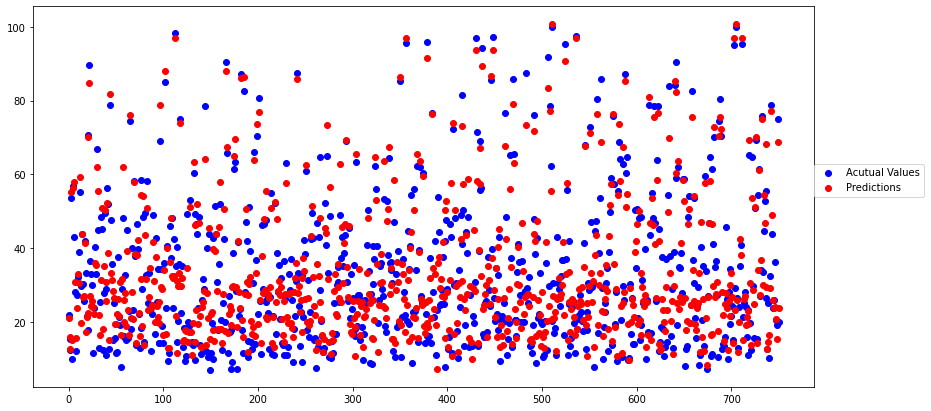

In [213]:
fig, ax = plt.subplots(figsize = (14,7))
x = np.arange(0, len(Xtest1), 1)
ax.scatter(x, ytest1, c='b', label="Acutual Values")
ax.scatter(x, cbt.predict(Xtest1), c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

In [214]:
#residuals = ytest - cbt.predict(xtest)
sns.regplot(residuals, ytest1)

NameError: name 'residuals' is not defined

# Pipeline creation - a custom transformer for the column

In [ ]:
class encode_columns(BaseEstimator, TransformerMixin):
    def __init__(self, columns = None):
        self.columns = columns
    
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        cols_to_transform = list(X.columns)
        if self.columns:
            cols_to_transform  = self.columns
        encoding = {
            'Classification_Size' : {
                'XL' : 1,
                'L' : 2,
                'M' : 3,
                'S' : 4},
            'Research_Intensity' : {
                'VH' : 1,
                'HI' : 2,
                'MD' : 3,
                'LO' : 4},
            'Status' : {
                'A' : 1,
                'B' : 2,
                'C' : 3}
            }
        for col in cols_to_transform:
            if col not in list(encoding.keys()):
                val_dict = {v: i for i, v in enumerate(np.unique(data[col]))}
                #print(val_dict)
            else:
                val_dict = encoding[col]
            X[col] = X[col].map(val_dict)
        return X

In [ ]:
list(cat_cols)

In [ ]:
process = [('encode columns', encode_columns(columns = list(cat_cols))), ('model', CatBoostRegressor())]
pipeline = Pipeline(process)

In [ ]:
pipeline.fit(Xtest1, ytest1)

In [ ]:
evaluate(ytest1, pipeline.predict(Xtest1))

In [ ]:
import pickle as pk
with open('final_model.pickle', 'wb') as f:
    pk.dump(cbt, f)